In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm



In [2]:
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC
from simplemc.models.HolographicCosmology import HolographicCosmology
from simplemc.models.LCDMCosmology import LCDMCosmology
from simplemc.models.TsallisCosmology import TsallisCosmology
from simplemc.models.BarrowHDECosmology import BarrowHDECosmology

Initalizing nu density look up table... Done


In [3]:
c_ = Parameter("c", 1., 0.2, (0.6, 1.), "c")

om_ = Parameter("Om", 0.3038, 0.05, (0.1, 0.5), "\Omega_m") 

In [5]:
T = T = HolographicCosmology(varyc=True)

c_data = np.arange(0.5, 2.5, 0.5)
T.Om = 0.3
T.c

1.0

In [6]:
## Agregar prints para asegurarnos de estar graficando con los parámetros requeridos
print(f"Initial value of self.Om: {T.Om}")  
print(f"Hubble parameter: {T.h}") 

Initial value of self.Om: 0.3
Hubble parameter: 0.6821


In [7]:
def eos_hd (c_x,omega=0.7):
    w = - (1/3)*(1 + 2*(np.sqrt(omega))/c_x)
    return w 


eos_hd_val = eos_hd(c_data)
eos_hd_val

array([-1.44888004, -0.89110668, -0.70518223, -0.61222001])

[-1.4488800353787674]
[-0.8911066843560503]
[-0.7051822340151448]
[-0.6122200088446919]


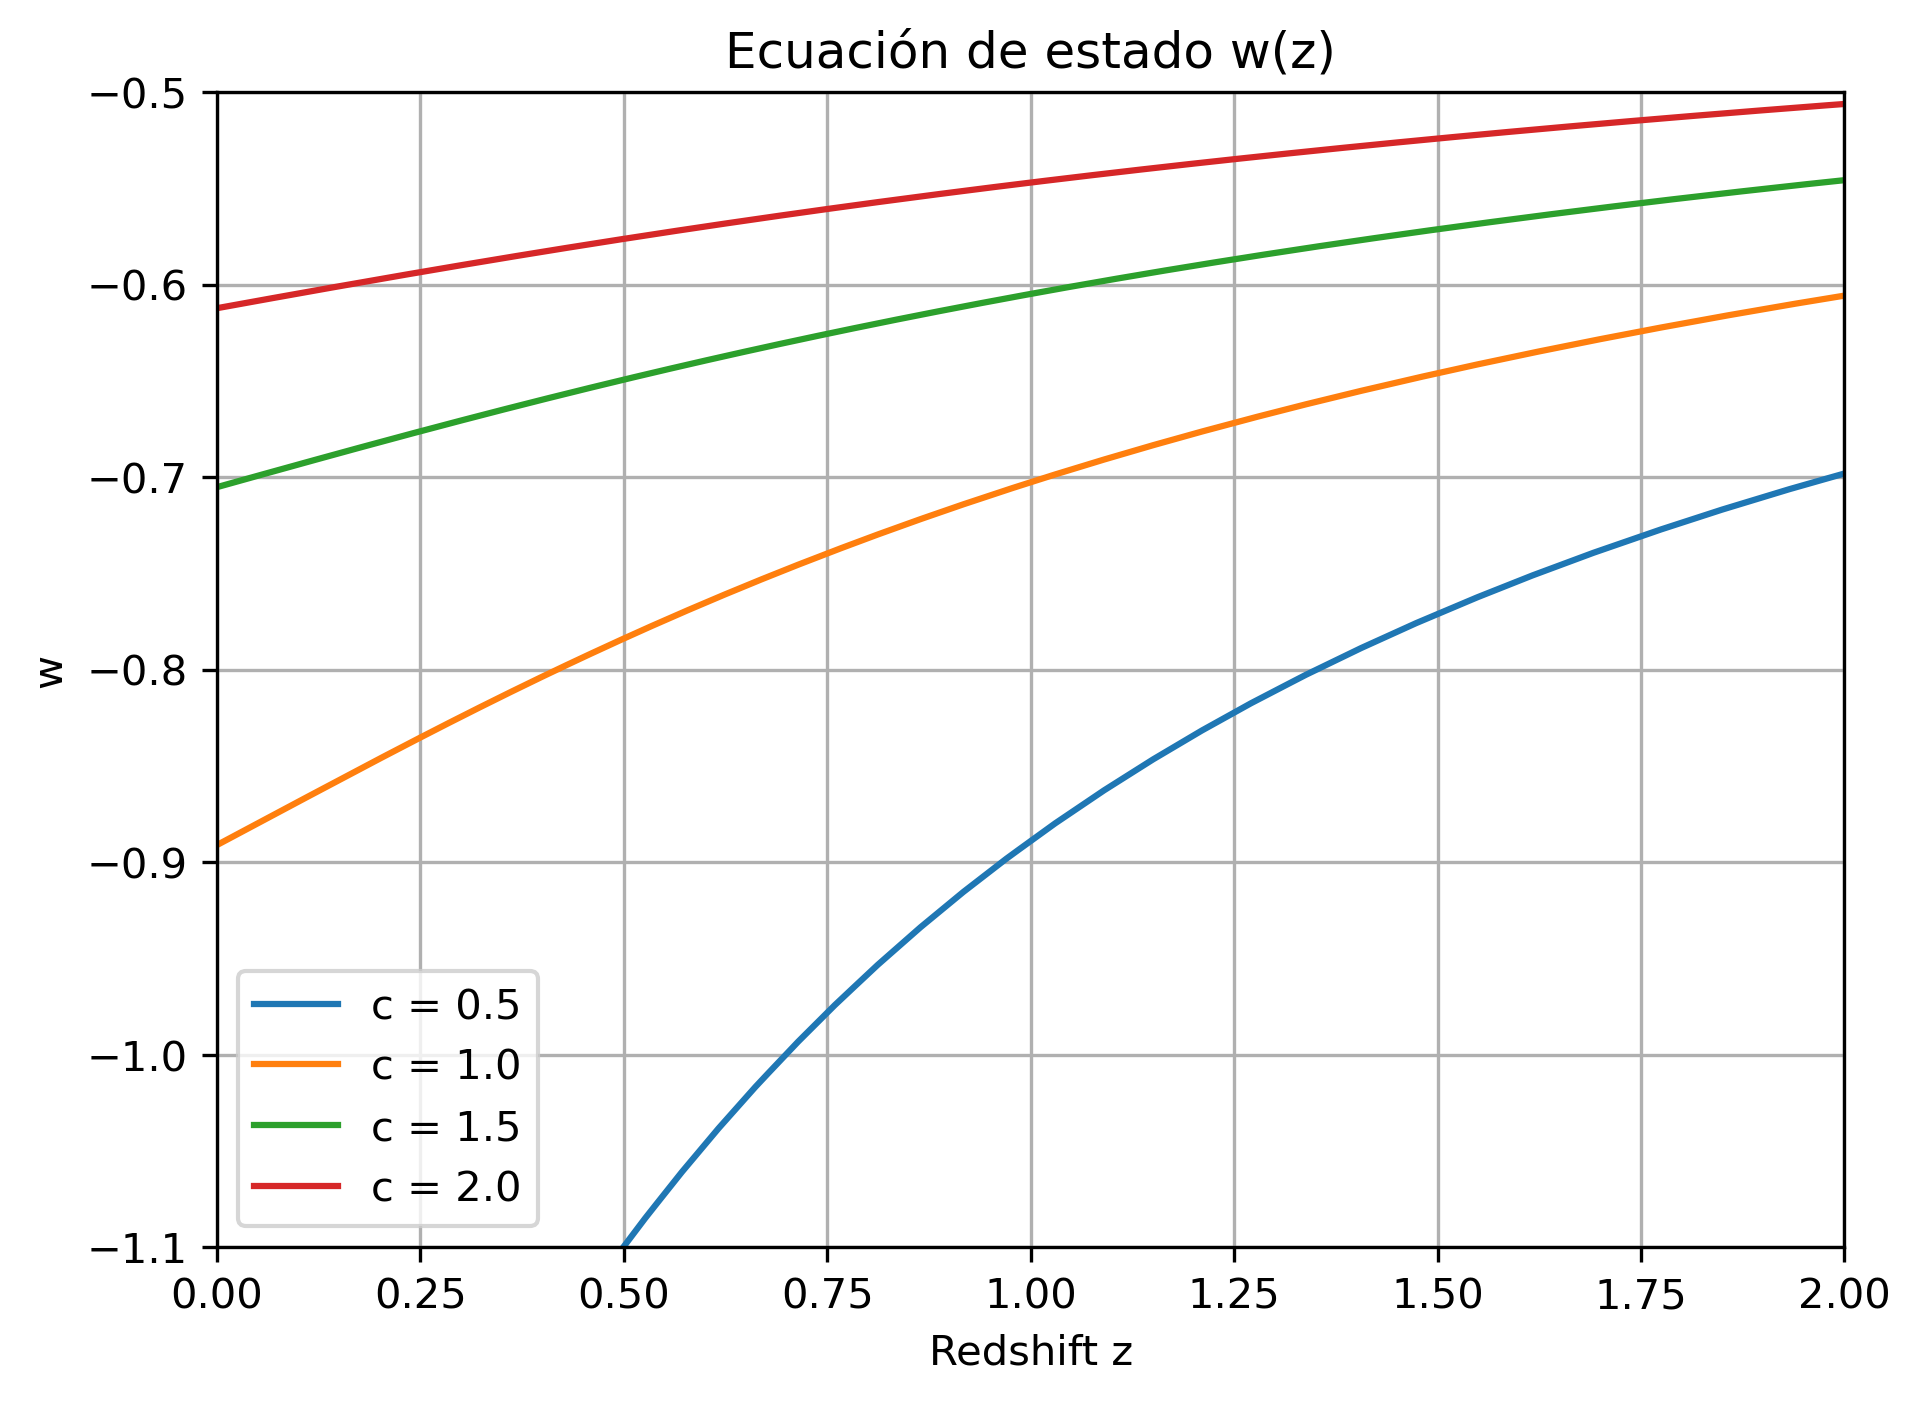

In [29]:
import os 
# Gráfica de w(z)
plt.figure(figsize=(7, 5), dpi=300)
zl = np.linspace(0, 3,400)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    print([T.EoS(0)])
    plt.plot(zl, [T.EoS(z) for z in zl], label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel("w")
plt.xlim(0, 2)
plt.ylim(-1.1, -0.5)
plt.legend()
plt.title("Ecuación de estado w(z)")
plt.grid()

# Specify the directory and filename
directory = "/home/alfonsozapata"  
filename = "wde1.pdf"

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the plot
filepath = os.path.join(directory, filename)
plt.savefig(filepath, format='pdf')



plt.show()

0.044005637847617796
0.10840680297815314
0.1580034662991
0.19362405929858525


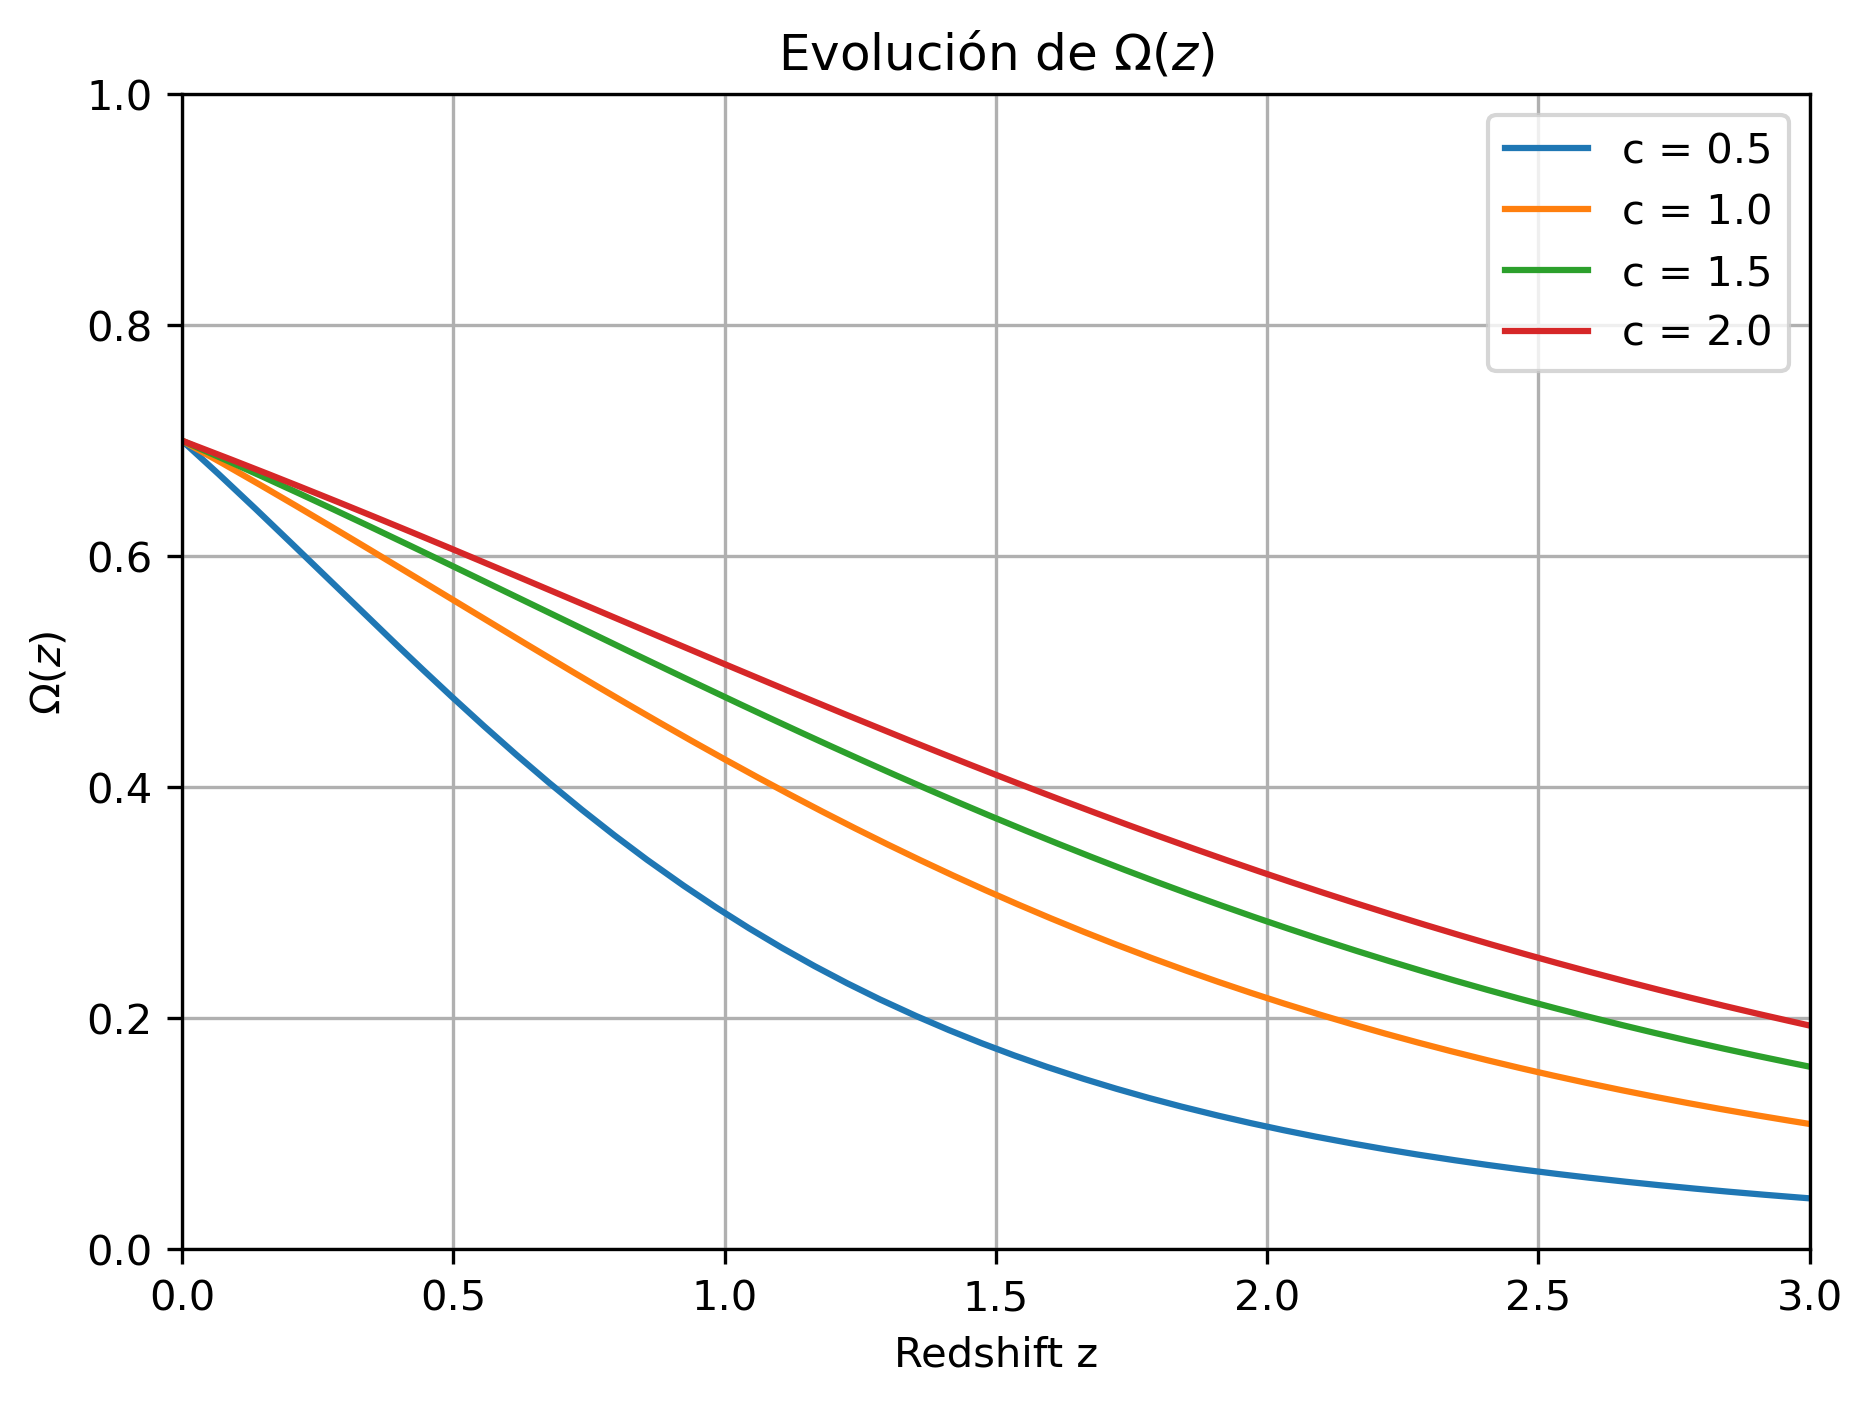

In [27]:
# Gráfica de \Omega(z)
xini = np.log(1./(1+3))
xval = np.linspace(0,xini,400)

plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    print(T.Ode(xini))
    plt.plot(zl, [T.Ode(x) for x in xval], label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 3)
plt.ylim(0, 1)
plt.legend()
plt.title(r"Evolución de $\Omega(z)$")
plt.grid()
plt.show()

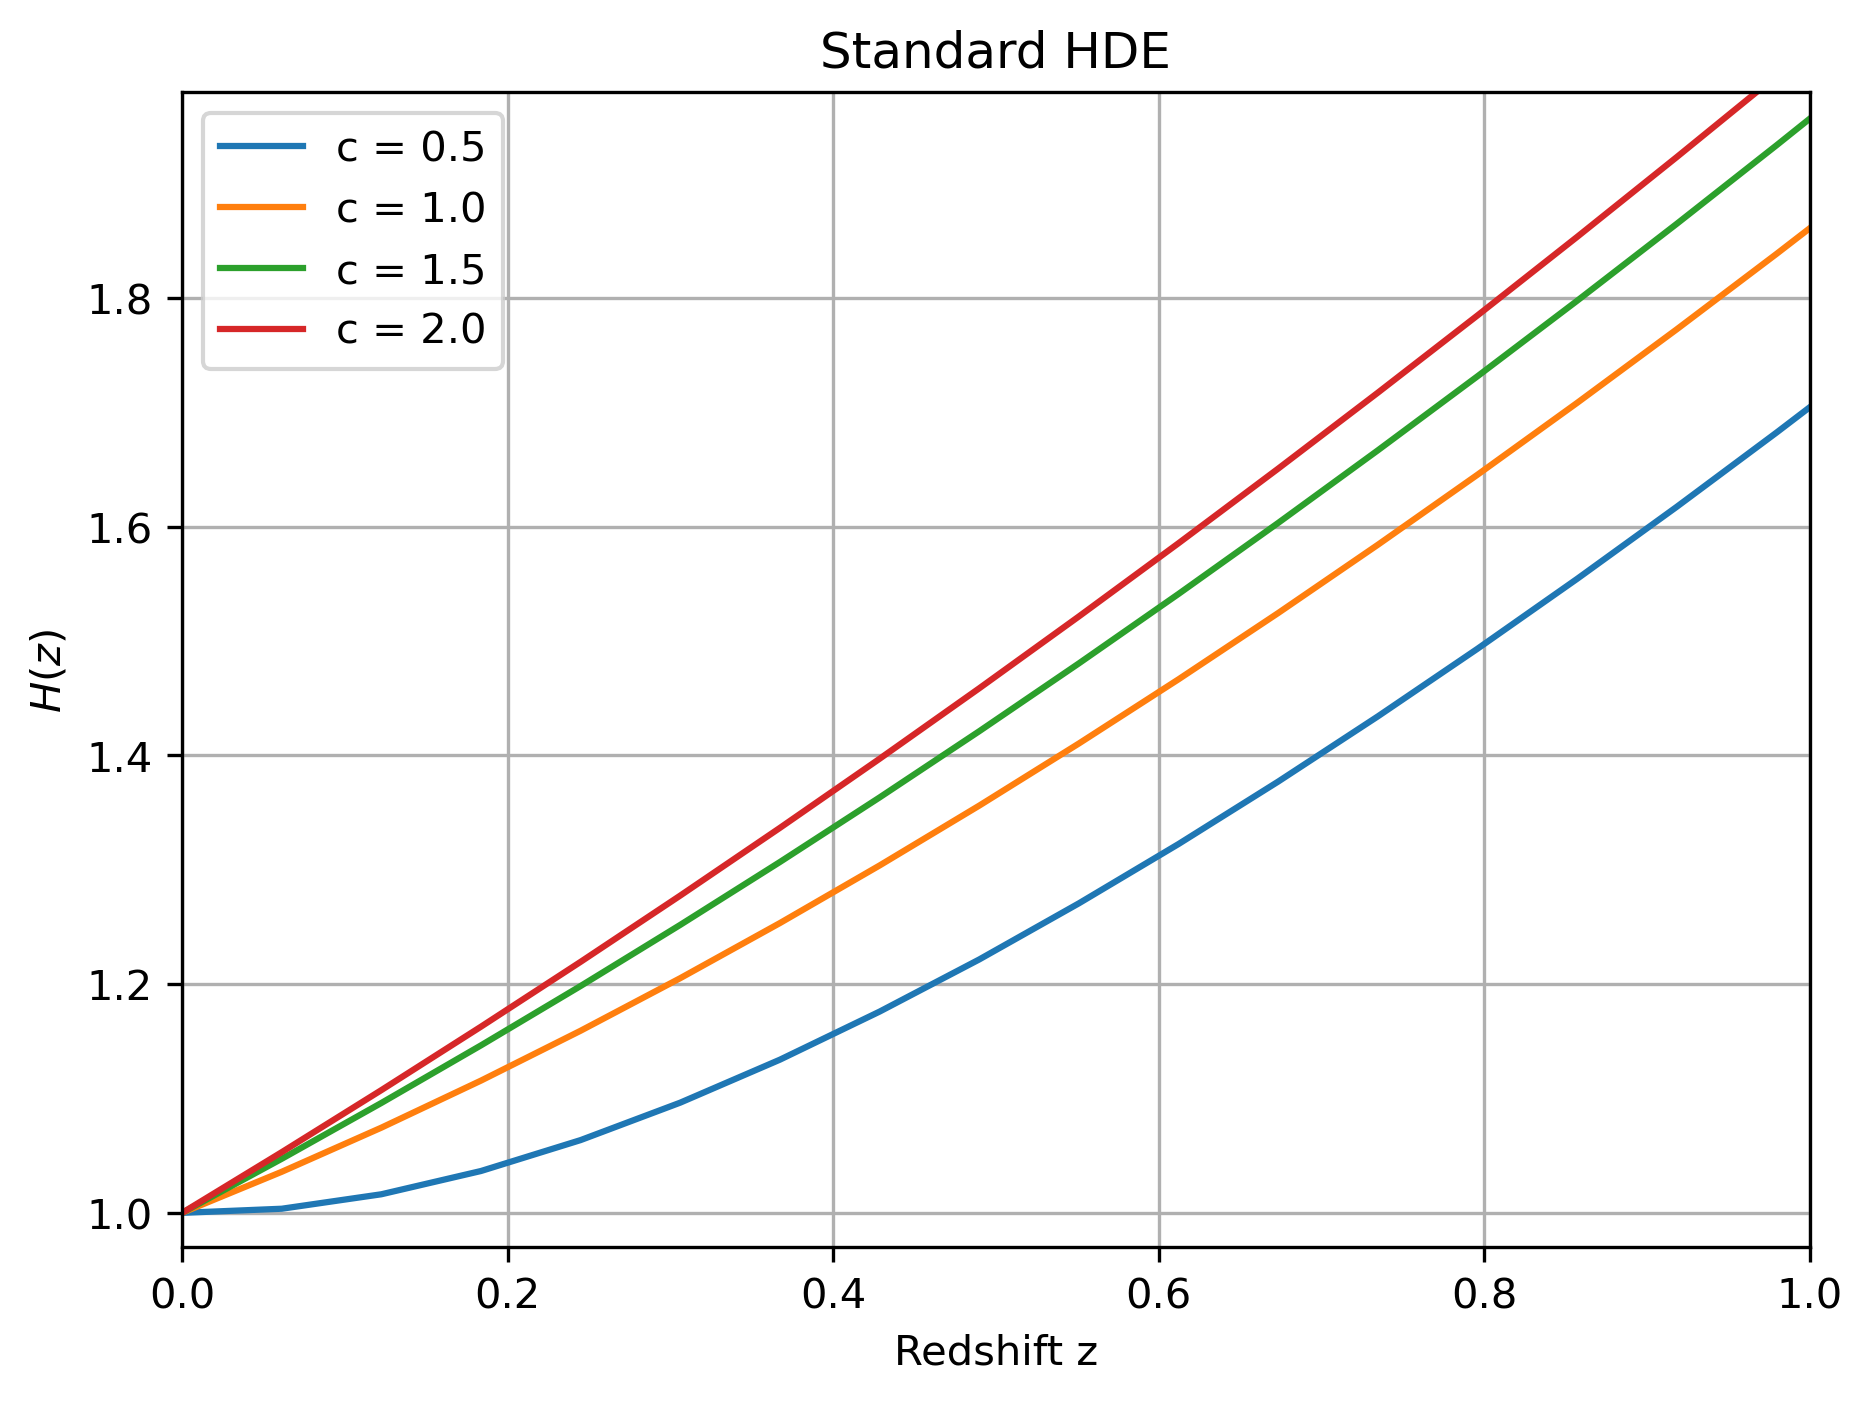

In [10]:
# Gráfica de H(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    plt.plot(zl, np.sqrt(T.RHSquared_a(1./(1 + zl))), label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$H(z)$")
plt.xlim(0, 1)
plt.ylim(0.97,1.98)  # Ajustar según sea necesario
plt.legend()
plt.title("Standard HDE")
plt.grid()
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def eos(c_x,b=0,omega=0.7):
    Q = (2 - b)*((c_x**2)**(1/(b - 2))) * ((70* np.sqrt(0.3))**(b / (b - 2)))
    w = - (1 + b)/3 - (Q / 3)*( omega**(1/(2 - b))) #*((1 - omega) ** (b / (2 * (b - 2))))

    print(Q)
    return w
 

b_data = np.arange(0.0,0.8,0.2)

eos(c_data)

 


[4.         2.         1.33333333 1.        ]


array([-1.44888004, -0.89110668, -0.70518223, -0.61222001])

INFO:_mathtext.py._get_glyph():563      Substituting symbol B from STIXNonUnicode
INFO:_mathtext.py._get_glyph():563      Substituting symbol B from STIXNonUnicode


[-1.4488072953104167]
[-0.8910843163922297]
[-0.7051704334716613]
[-0.6122123252047089]


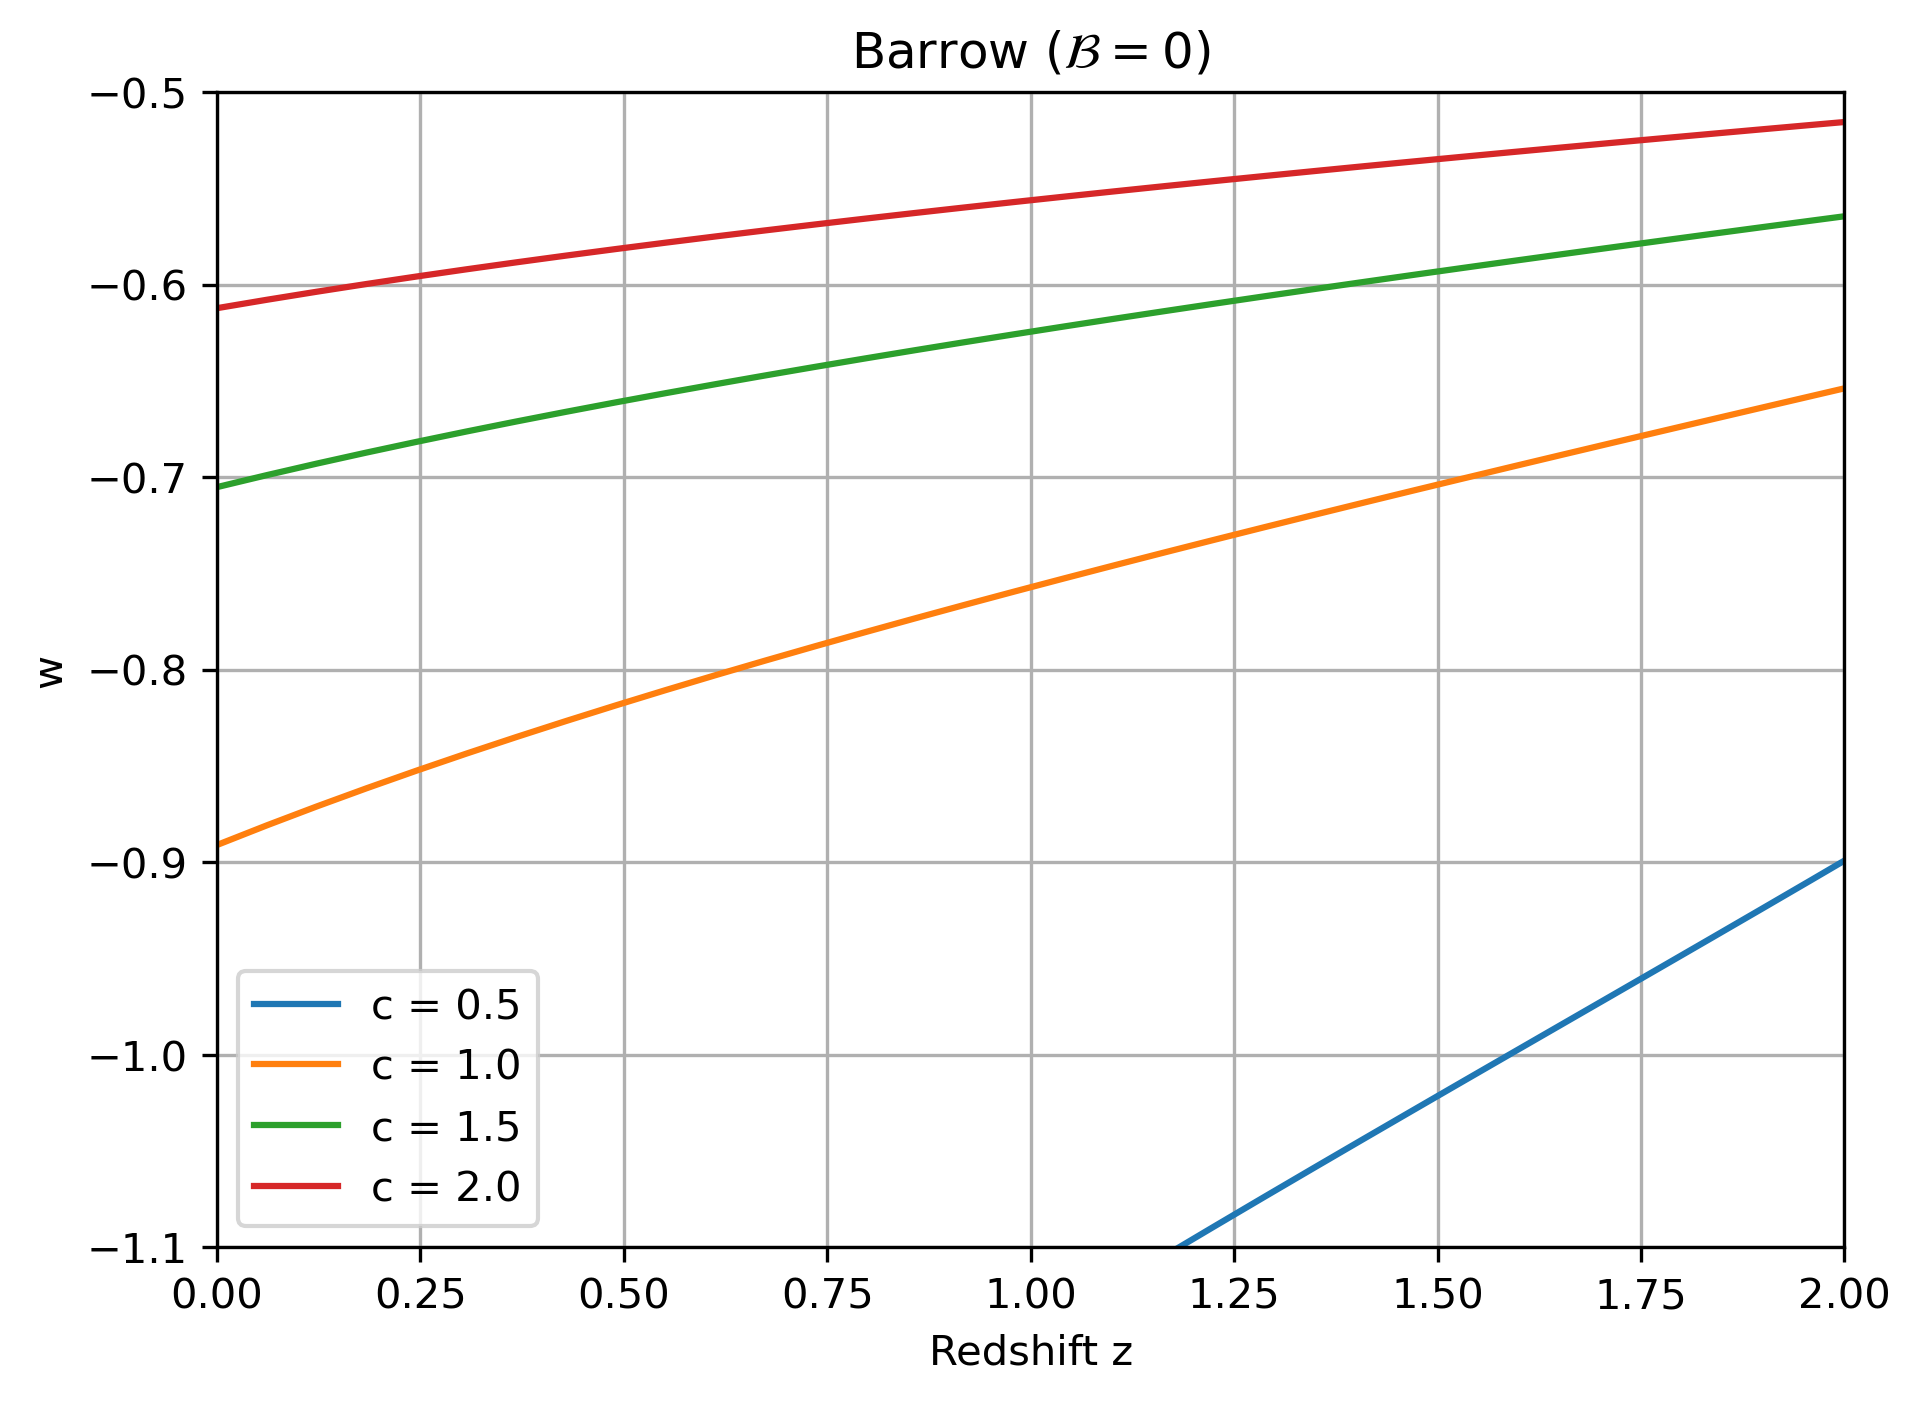

In [11]:
b_ = Parameter("b",0.5,0.1,  (0.0, 1.0), "s")
Bs = Bs = BarrowHDECosmology(varyb=True)

#b_data = np.linspace(0.0,1.0,5)
Bs.Om = 0.3
Bs.b = 0.0
#  w(z) plot
zini = 3.0
xini = np.log(1/(1+zini))

zval = np.linspace(0.000,zini)
plt.figure(figsize=(7, 5), dpi=300)

xval = np.linspace(0.00001,xini)
#eos = Bs.EoS(zval)


for val in c_data:
    c_.setValue(val)
    Bs.updateParams([c_])
    print([Bs.EoS(0)])
    plt.plot(zval, [Bs.EoS(z) for z in zval], label=f"c = {val:.1f}")


#for val in c_data:
#    c_.setValue(val)
#    T.updateParams([c_])
#    print([T.EoS(0)])
#    plt.plot(zl, [T.EoS(z) for z in zl], label=f"c = {val:.1f}")


#plt.plot(zval,eos)
plt.xlabel("Redshift z")
plt.ylabel("w")
plt.xlim(0, 2)
plt.ylim(-1.1, -0.5)
plt.legend()
plt.title("Barrow ($\mathcal{B}=0$)")
plt.grid()
plt.show()
    
 

0.04400564208759124
0.10840680735785213
0.1580034603581488
0.19362406486474495


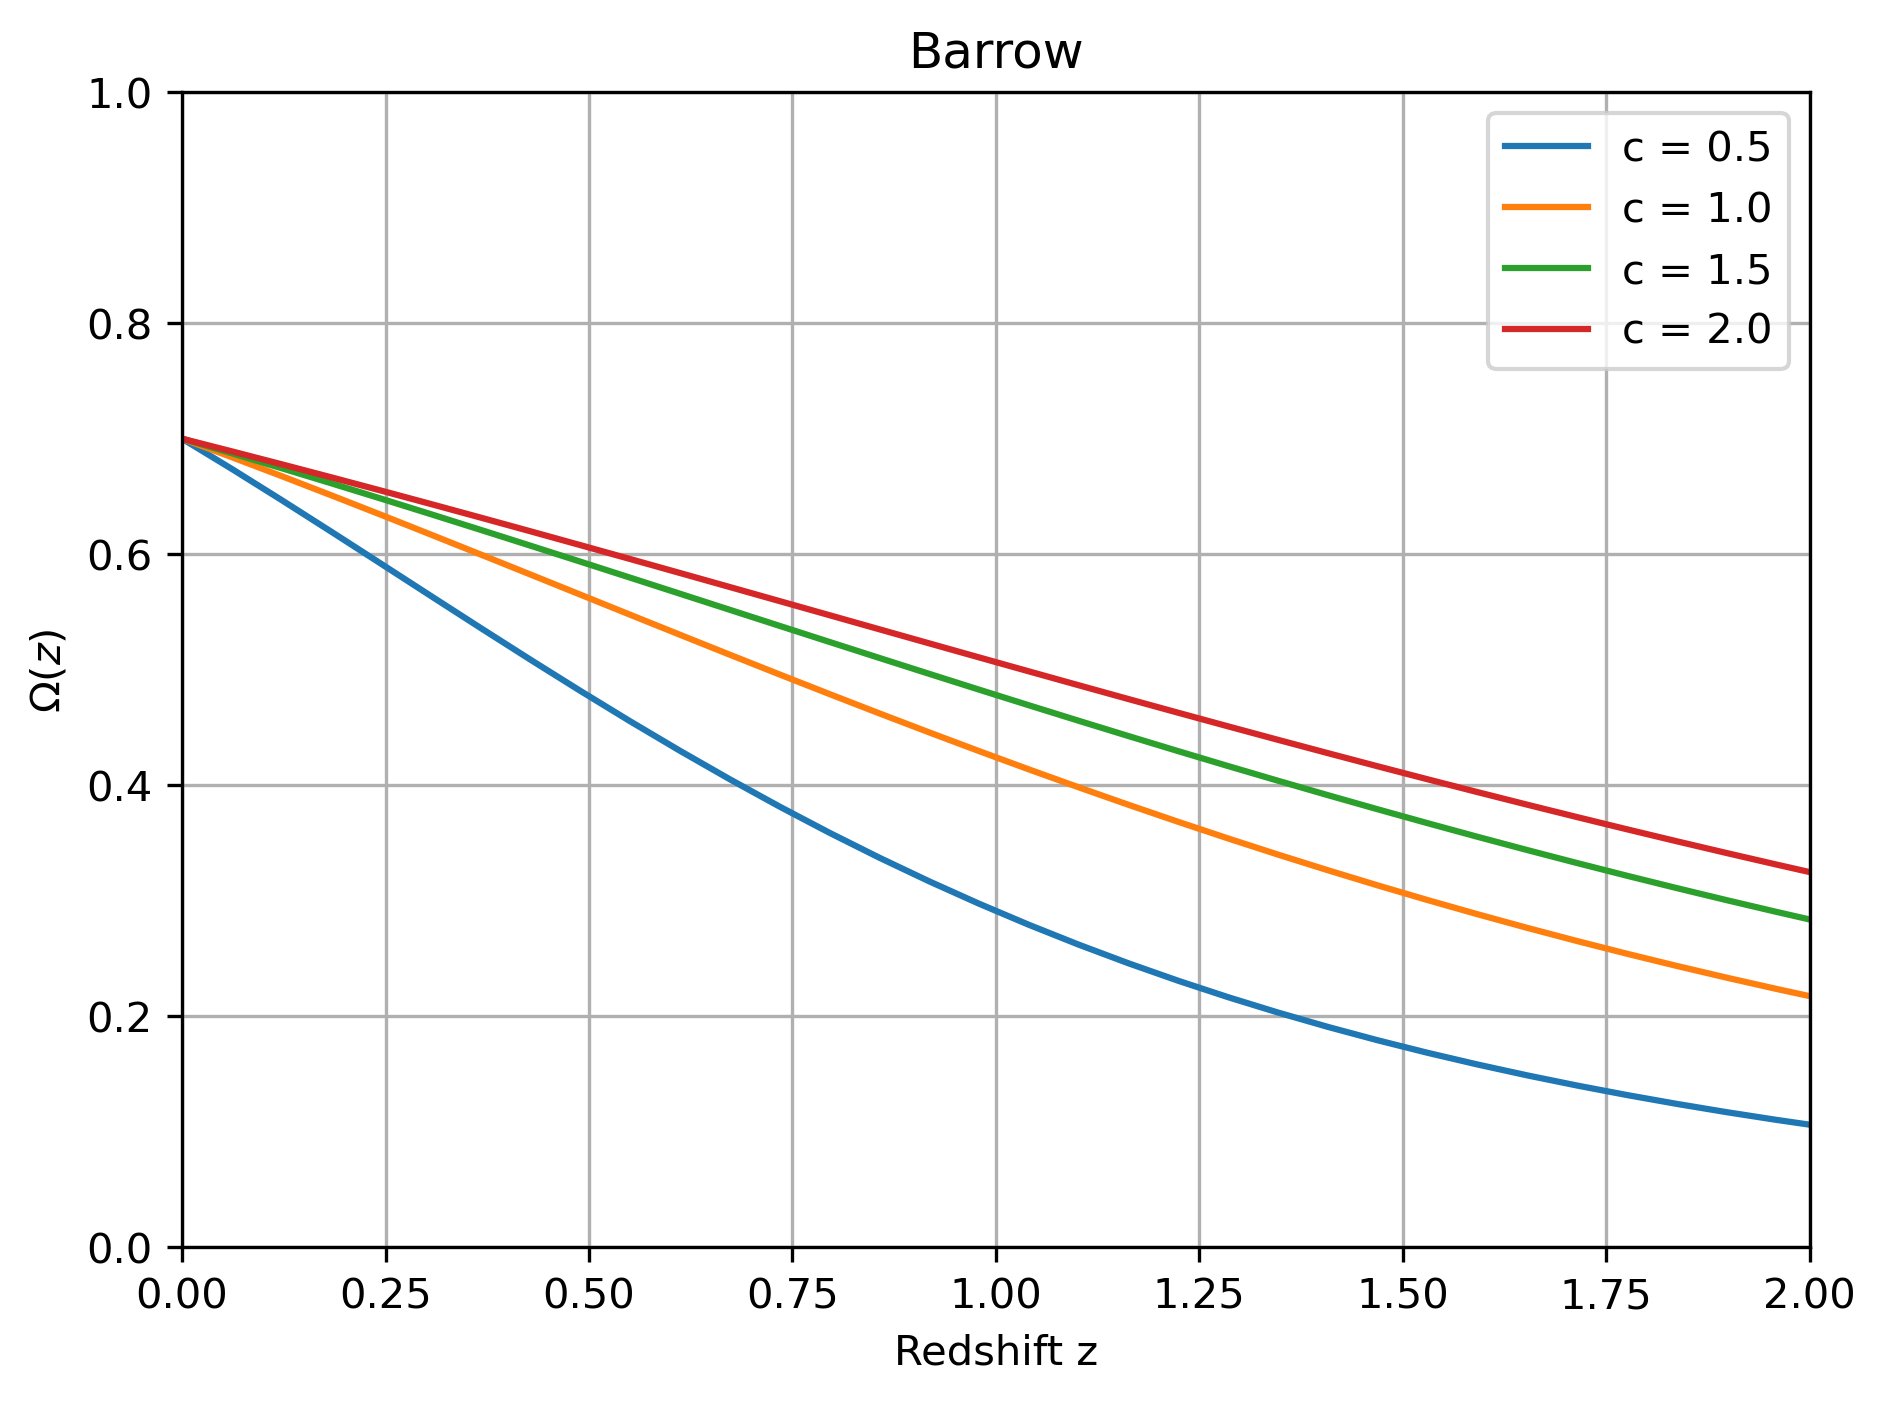

In [20]:
# Gráfica de \Omega(z)
xini = np.log(1./(1+3))
xval = np.linspace(0,xini)

plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    Bs.updateParams([c_])
    print(Bs.Ode(xini))
    plt.plot(zval, [Bs.Ode(x) for x in xval], label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend()
plt.title(r"Barrow")
plt.grid()
plt.show()

In [22]:
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]



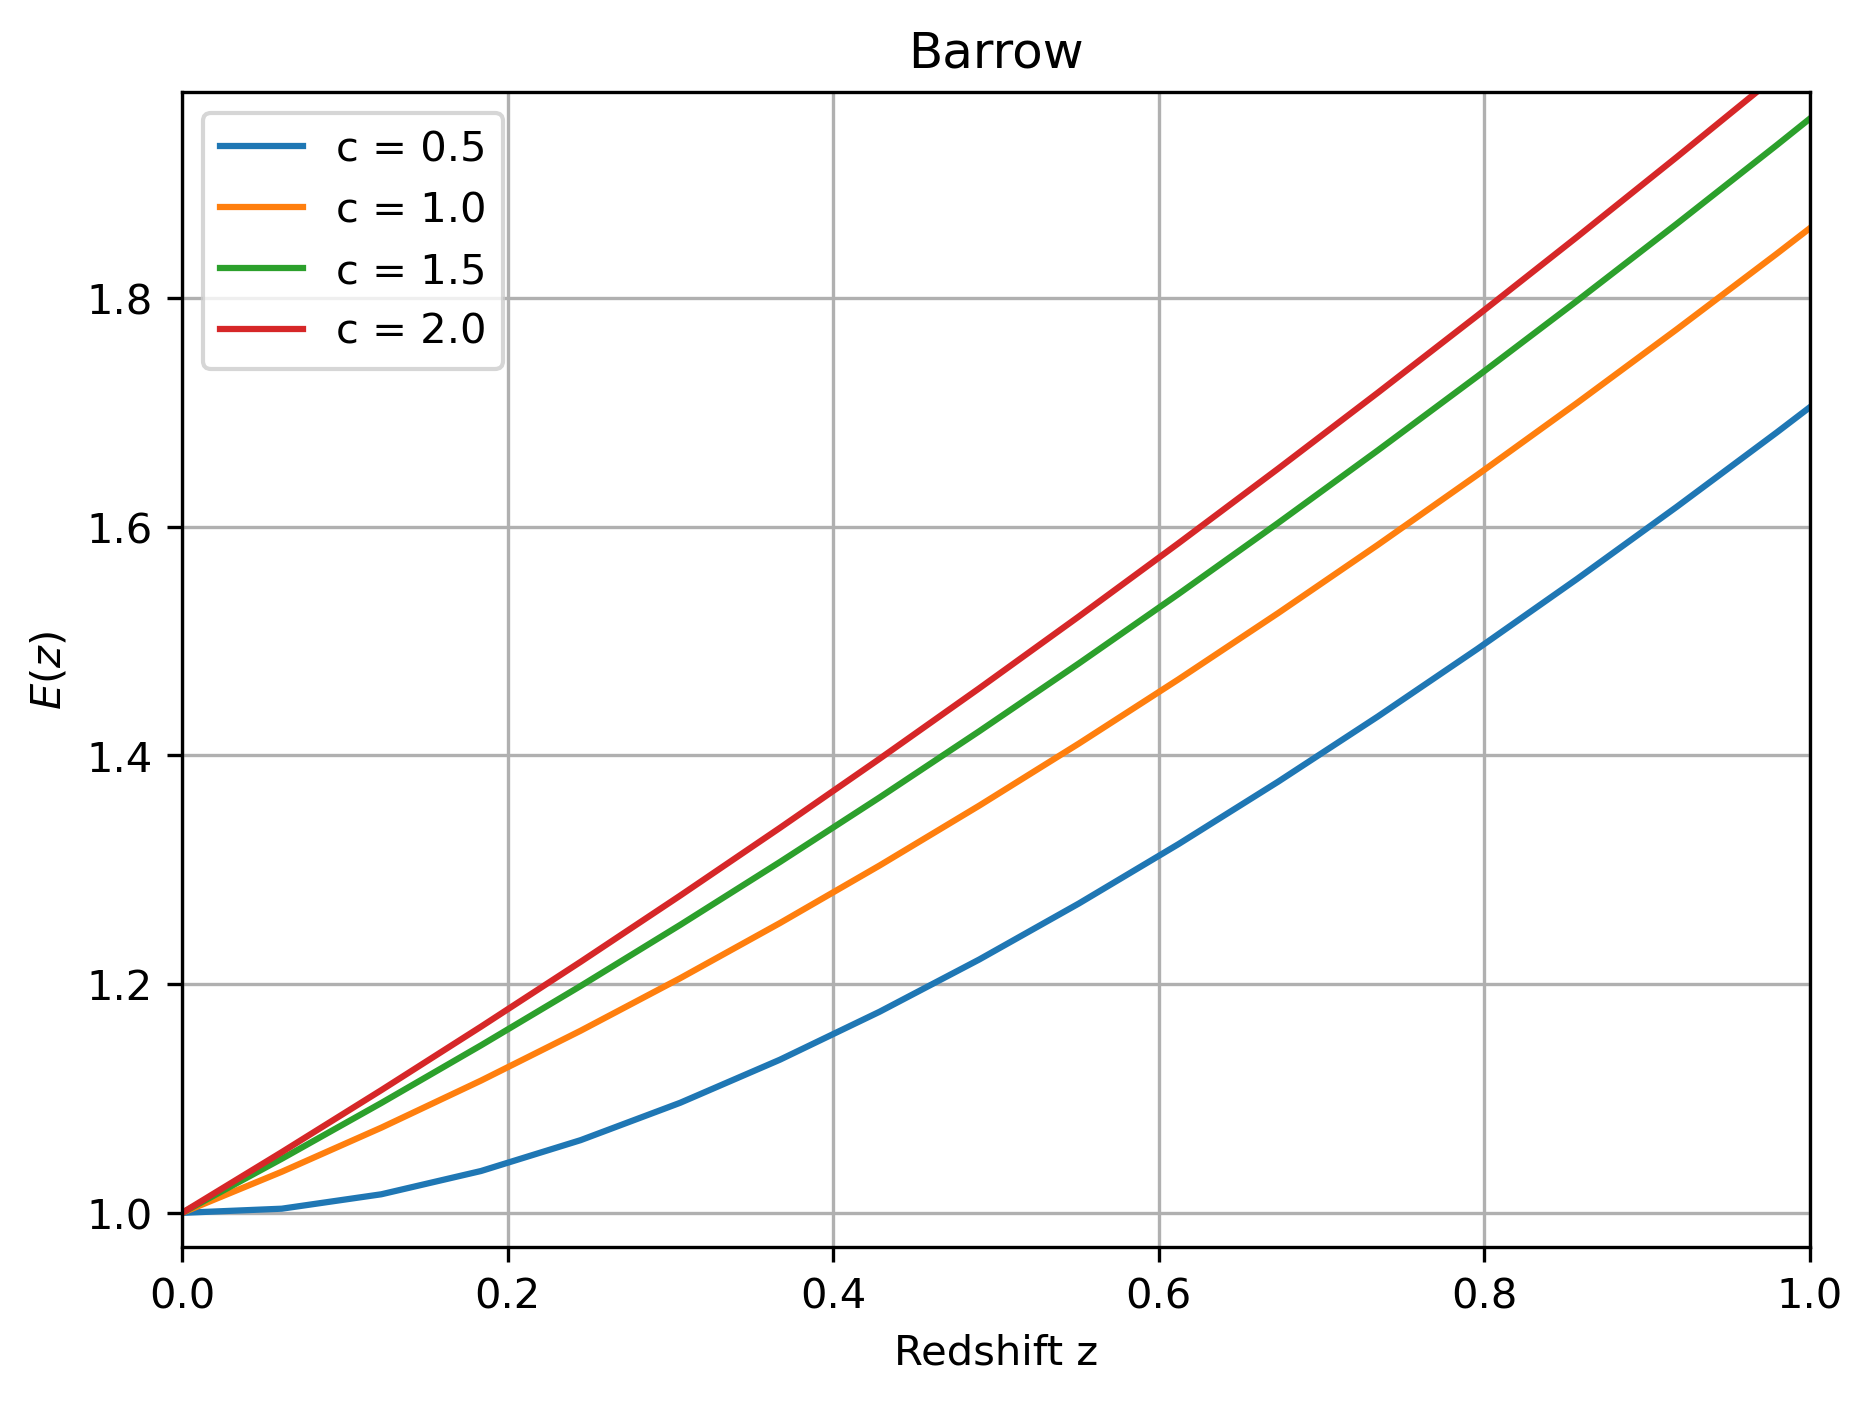

In [21]:
# Gráfica de H(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    Bs.updateParams([c_])
    plt.plot(zl, np.sqrt(Bs.RHSquared_a(1./(1 + zl))), label=f"c = {val:.1f}")

#plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.xlabel("Redshift z")
plt.ylabel(r"$E(z)$")
plt.xlim(0, 1)
plt.ylim(0.97,1.98)  # Ajustar según sea necesario
plt.legend()
plt.title("Barrow")
plt.grid()
plt.show()

[-0.8911066843560502]
[-1.1867839652042356]
[-1.6931086684672871]
[-2.742850612277153]
[-5.560670613611229]


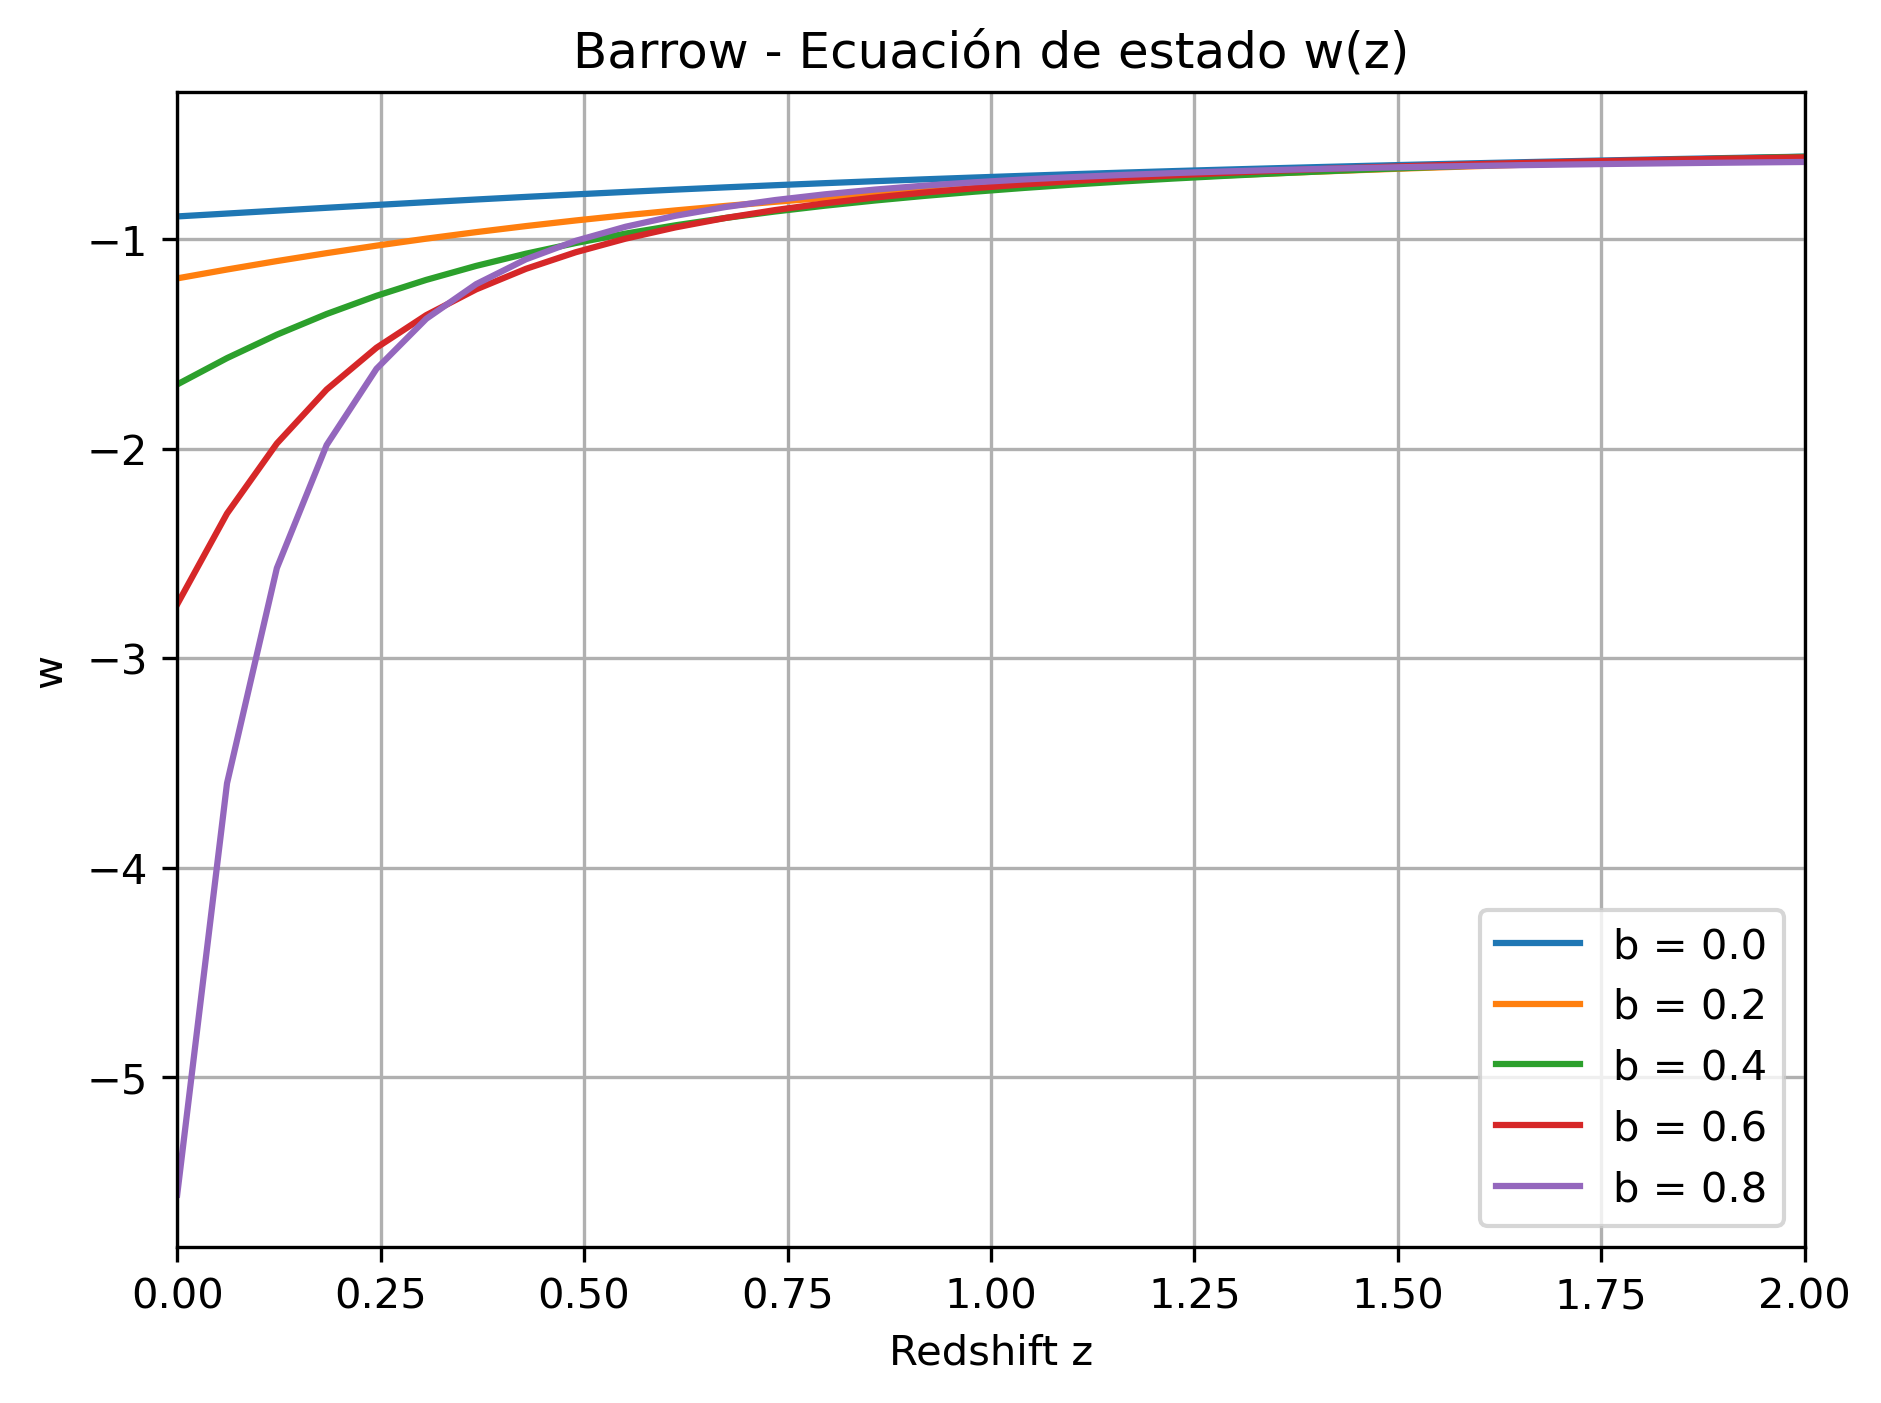

In [22]:
b_ = Parameter("b",0.5,0.1,  (0.0, 1.0), "b")
Bs = Bs = BarrowHDECosmology(varyb=True)

b_data = np.linspace(0.0,1.0,5)
Bs.Om = 0.3
Bs.c = 1.0
#  w(z) plot
zini = 3.0
xini = np.log(1/(1+zini))

zval = np.linspace(0,zini)
plt.figure(figsize=(7, 5), dpi=300)

xval = np.linspace(0.0,xini)
#eos = Bs.EoS(zval)

b_data = np.arange(0.0,1.0,0.2)

for val in b_data:
    b_.setValue(val)
    Bs.updateParams([b_])
    print([Bs.EoS(0)])
    plt.plot(zval, [Bs.EoS(z) for z in zval], label=f"b = {val:.1f}")


#plt.plot(zval,eos)
plt.xlabel("Redshift z")
plt.ylabel("w")
plt.xlim(0, 2)
#plt.ylim(-1.1, -0.5)
plt.legend()
plt.title("Barrow - Ecuación de estado w(z)")
plt.grid()
plt.show()
    
 

0.10840680735785213
0.059175448331353235
0.028435513067238908
0.012084480062114171
0.004668520381764889


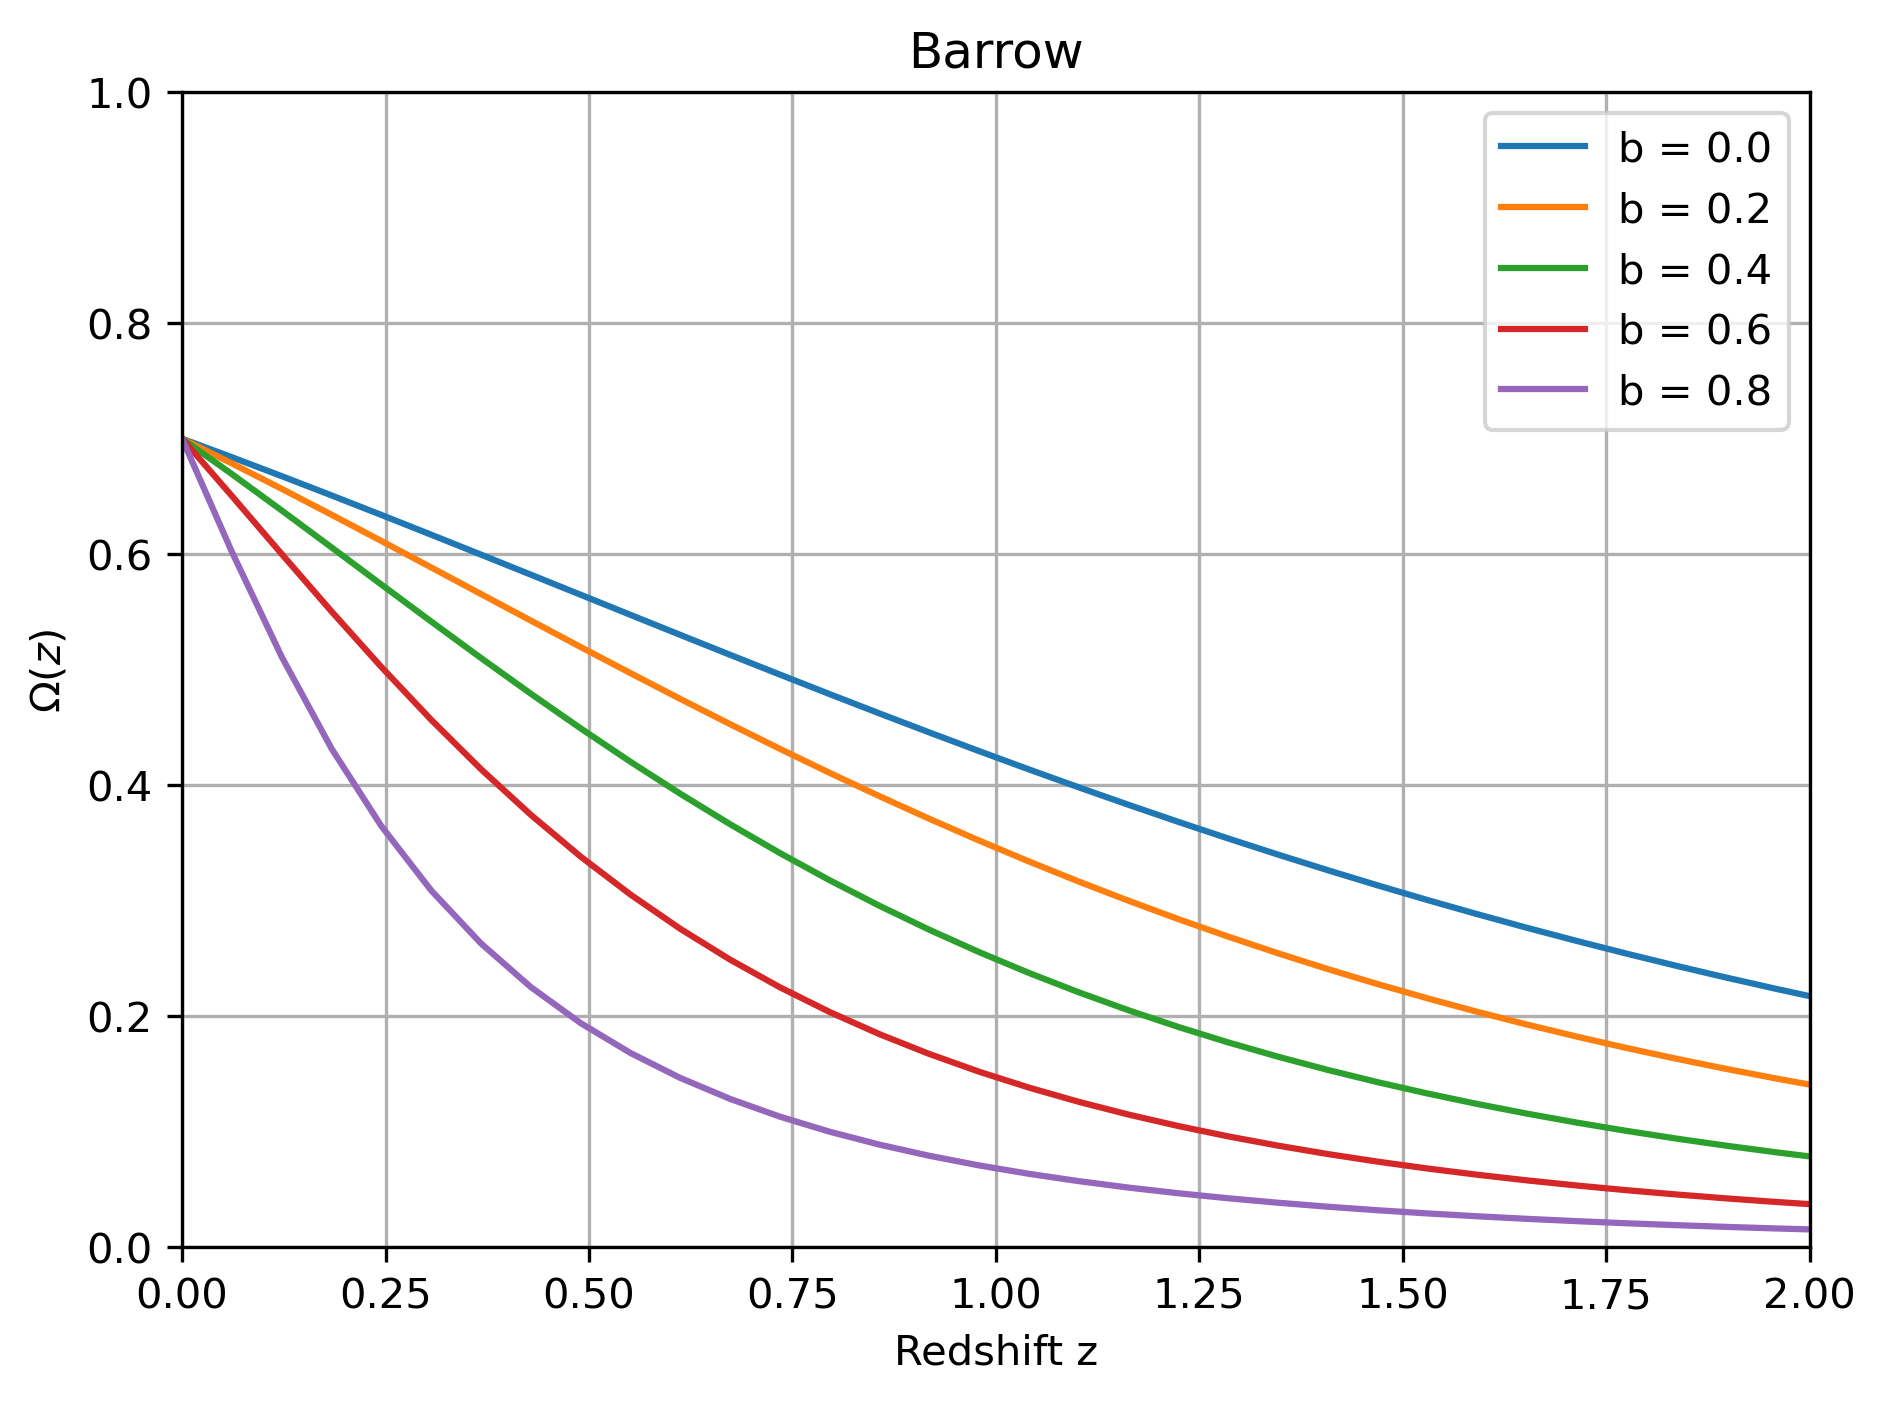

In [52]:
# Gráfica de \Omega(z)
xini = np.log(1./(1+3))
xval = np.linspace(0,xini)

plt.figure(figsize=(7, 5), dpi=300)
for val in b_data:
    b_.setValue(val)
    Bs.updateParams([b_])
    print(Bs.Ode(xini))
    plt.plot(zval, [Bs.Ode(x) for x in xval], label=f"b = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend()
plt.title(r"Barrow")
plt.grid()
plt.show()

In [19]:

def eos_z0(b,c_x=1,omega=0.7):
    Q = (2 - b)*((c_x**2)**(1/(b - 2))) * ((70* np.sqrt(0.3))**(b / (2- b)))
    w = - (1 + b)/3 - (Q / 3)*( omega**(1/(2 - b)))*((1 - omega)**(b / (2 * (b - 2)))) #*np.exp(3*b/(2*(2-b)))

    print(Q)

    return w
 

b_data = np.arange(0.0,0.8,0.2)

eos_z0(b_data)


[2.         2.69919698 3.98138934 6.68096033]


array([-0.89110668, -1.18905177, -1.7010769 , -2.76751676])

In [20]:
s_ = Parameter("s",1.5,0.1,  (1.0, 2.0), "s")
Ts = Ts = TsallisCosmology(varys=True)


s_data = np.linspace(0.8,1.3,5)
Ts.Om = 0.3
Ts.c = 1.0
#  w(z) plot

plt.figure(figsize=(7, 5), dpi=300)

for val in s_data:
    s_.setValue(val)
    Ts.updateParams([s_])
    plt.plot(zval, [Ts.EoS(z) for z in zval], label=f"s = {val:.1f}")


#plt.plot(zval,eos)
plt.xlabel("Redshift z")
plt.ylabel("$\omega_{de}$")
#plt.xlim(0, 2)
#plt.ylim(-1.1, -0.5)
plt.legend()
plt.title("THDE")
plt.grid()
plt.show()
    
 

NameError: name 'zval' is not defined

<Figure size 2100x1500 with 0 Axes>

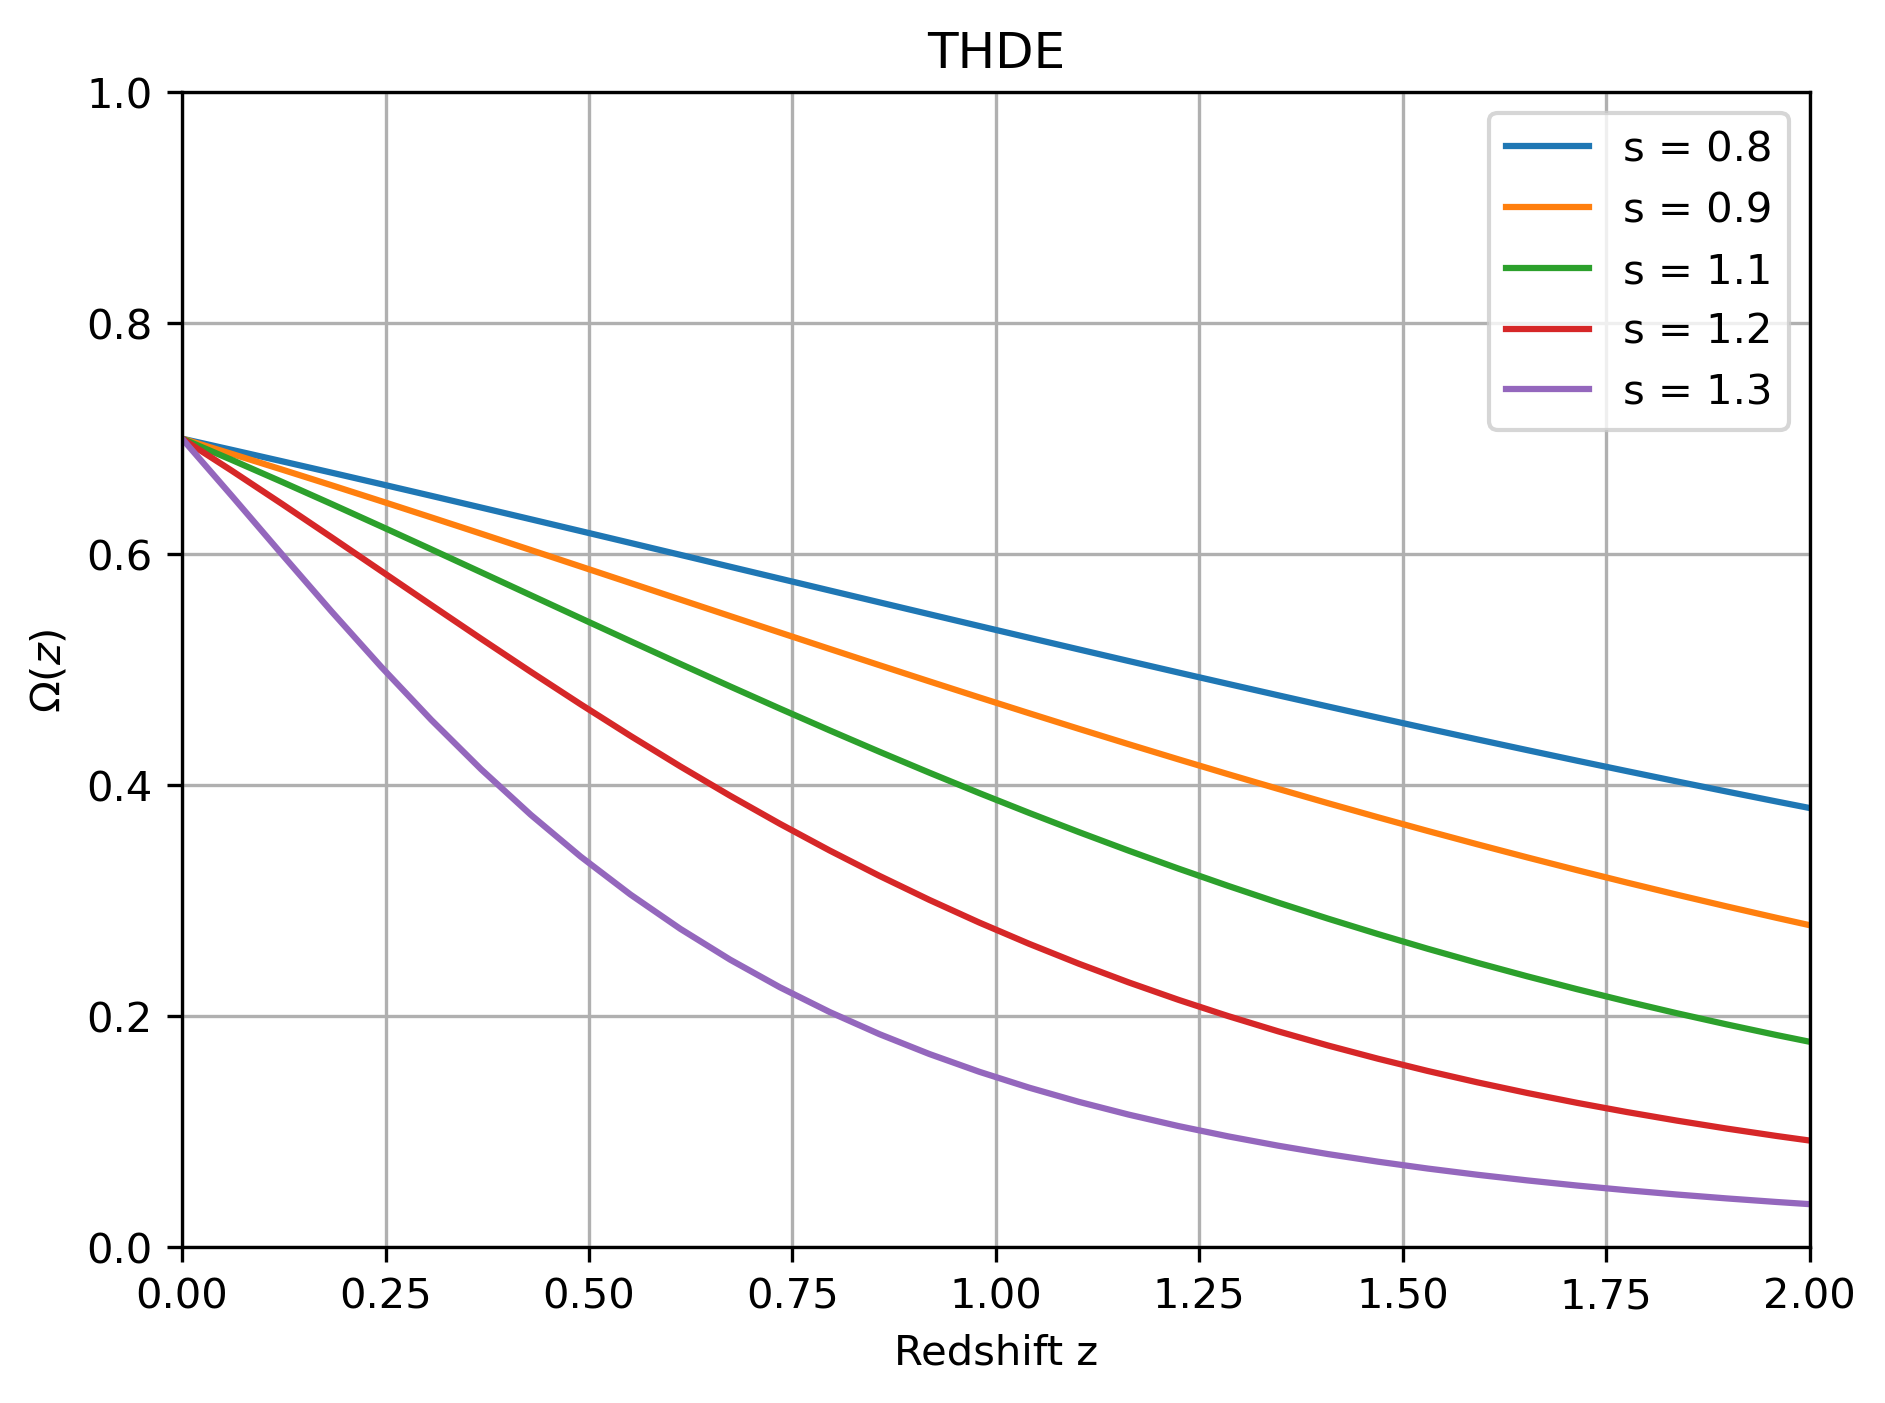

In [18]:
# Gráfica de \Omega(z)
xini = np.log(1./(1+3))
xval = np.linspace(0,xini)

plt.figure(figsize=(7, 5), dpi=300)
for val in s_data:
    s_.setValue(val)
    Ts.updateParams([s_])
    plt.plot(zval, [Ts.Ode(x) for x in xval], label=f"s = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend()
plt.title(r"THDE")
plt.grid()
plt.show()

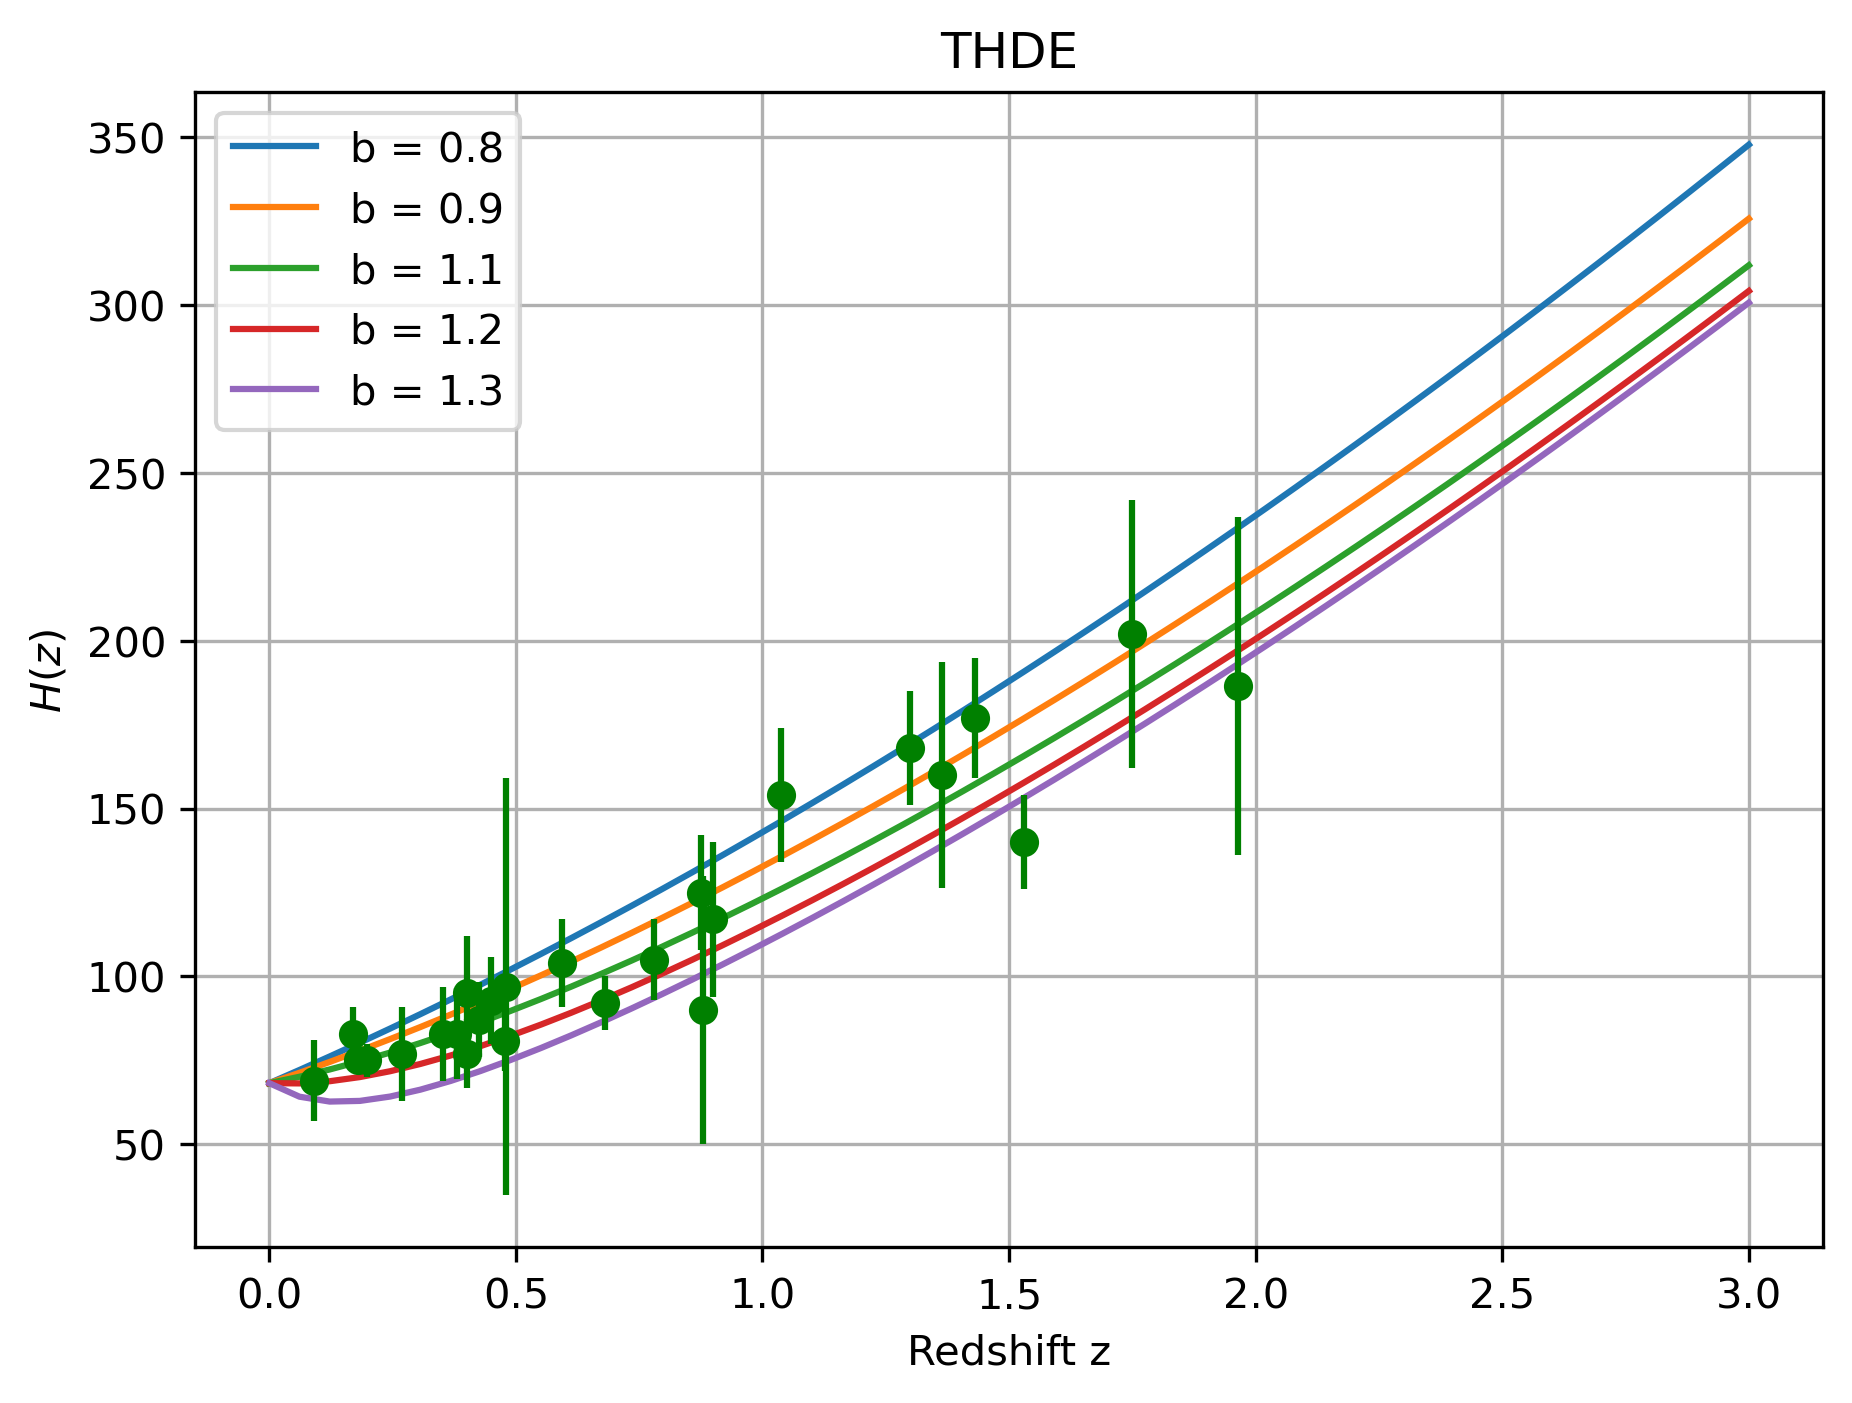

In [19]:
# Gráfica de H(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in s_data:
    s_.setValue(val)
    Ts.updateParams([s_])
    plt.plot(zval, Ts.h*100*np.sqrt(Ts.RHSquared_a(1./(1 + zval))), label=f"b = {val:.1f}")

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.xlabel("Redshift z")
plt.ylabel(r"$H(z)$")
#plt.xlim(0, 1)
#plt.ylim(0.97,1.98)  # Ajustar según sea necesario
plt.legend()
plt.title("THDE")
plt.grid()
plt.show()

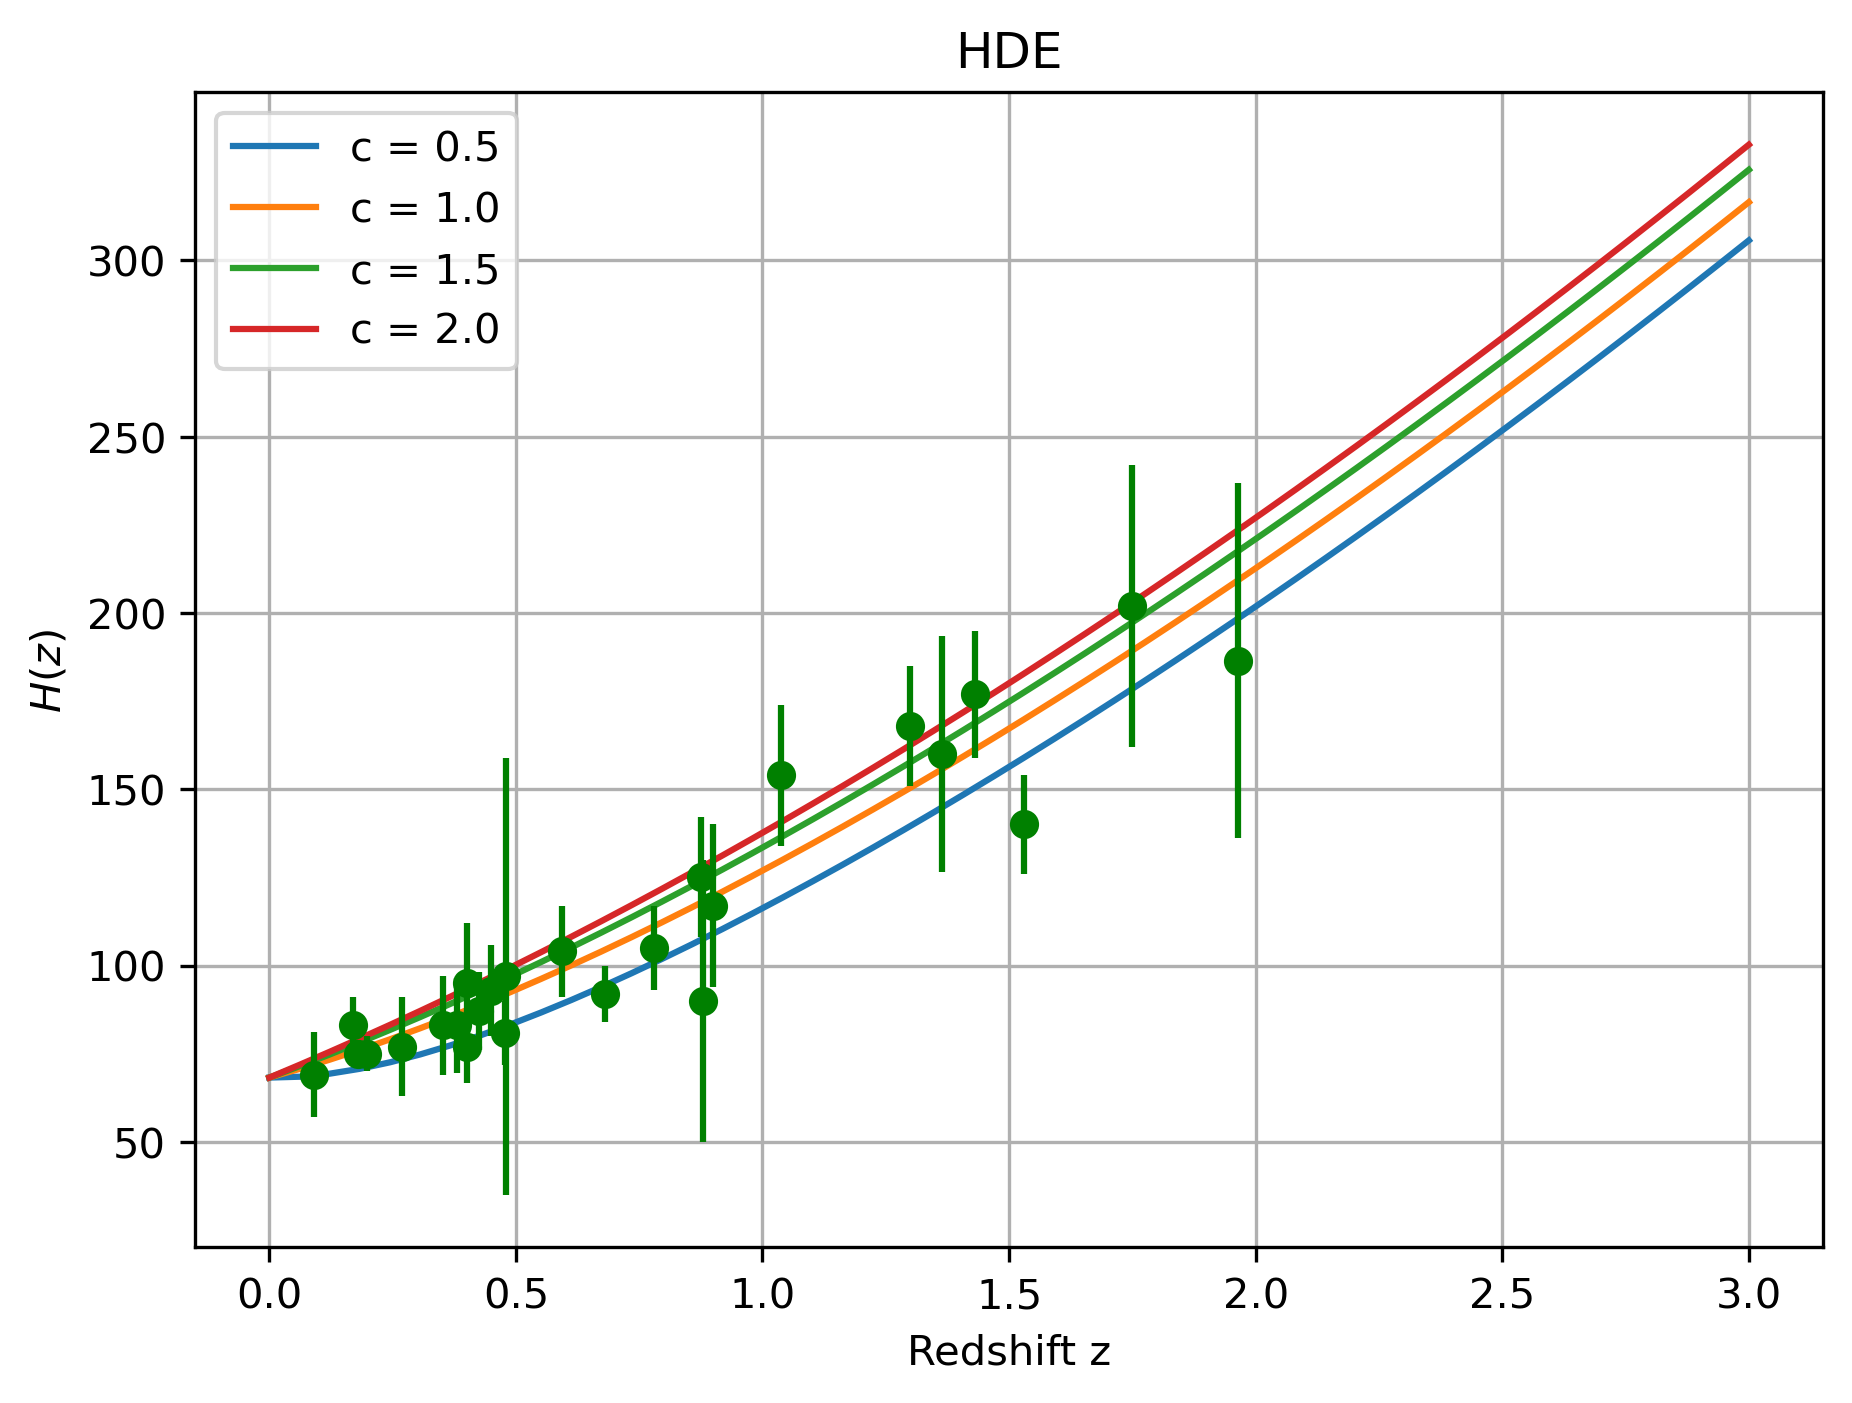

In [30]:
import os 

zini = 3.0
xini = np.log(1/(1+zini))

zval = np.linspace(0,zini)


# Gráfica de H(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    plt.plot(zval, T.h*100*np.sqrt(T.RHSquared_a(1./(1 + zval))), label=f"c = {val:.1f}")

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.xlabel("Redshift z")
plt.ylabel(r"$H(z)$")
#plt.xlim(0, 1)
#plt.ylim(0.97,1.98)  # Ajustar según sea necesario
plt.legend()
plt.title("HDE")
plt.grid()

# Specify the directory and filename
directory = "/home/alfonsozapata"  
filename = "hdee1.pdf"

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the plot
filepath = os.path.join(directory, filename)
plt.savefig(filepath, format='pdf')




plt.show()

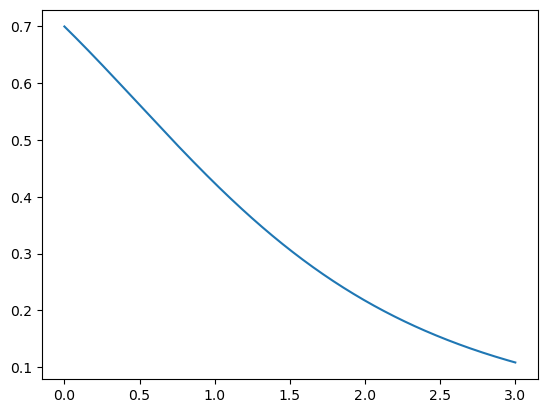

In [23]:
from scipy.interpolate import interp1d

from scipy.integrate import odeint

xini     = np.log(1./(1+3))
xvals   =  np.linspace(0,xini,400)
zvals  = np.linspace(0,3,400)
def RHS_hde( Omega, x,c=1):


        fact = (1 + 2*np.sqrt(Omega)/c) 

        dOmega = Omega*(1 - Omega)*fact 

        return dOmega

Ode0 =  0.7

result_E = odeint(RHS_hde, Ode0, xvals)
Ode = result_E.reshape(-1)


plt.plot(zvals,Ode)




## The analytic solution to the differential eq. of HDE is 
$$
2c \left[ \frac{4 \ln(\frac{c}{\sqrt{\Omega_{de}}} + 2)}{c(c^2-4)} - \frac{\ln{\frac{1}{\sqrt{\Omega_{de}}}  + 1}}{2c-4}  - \frac{\ln{\frac{1}{\sqrt{\Omega_{de}}} -1 }}{2c + 4}\right] = x + x_0
$$

## with $x = ln(a) $ for $a_0 = 1 $. For $c = 1$, we get the solution  
$$
\ln(\Omega_{de}) - \frac{1}{3}\ln(1-\sqrt{\Omega_{de}}) + \ln(1 + \sqrt{\Omega_{de}}) - \frac{8}{3} \ln(1 + 2\sqrt{\Omega_{de}}) - (x + x_0 ) = 0

$$


0.044005637847617796
0.10840680297815314
0.1580034662991
0.19362405929858525


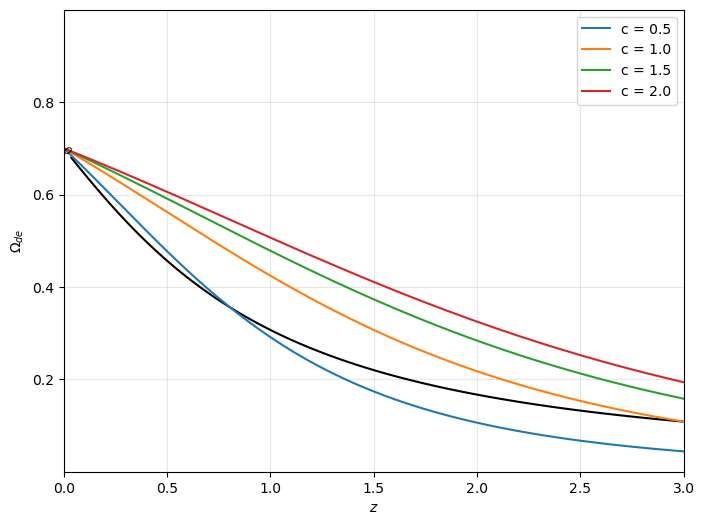

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función implícita
def F(Omega_de, x):
    x = np.log(1/(1+z))
    x0 = np.log(0.7) - (1/3)*np.log(1-np.sqrt(0.7))  + np.log(1+np.sqrt(0.7))  - (8/3)*np.log(1+2*np.sqrt(0.7)) 
    term1 = np.log(Omega_de)
    term2 = -(1/3) * np.log(1 - np.sqrt(Omega_de))
    term3 = np.log(1 + np.sqrt(Omega_de))
    term4 = -(8/3) * np.log(1 + 2 * np.sqrt(Omega_de))
    return term1 + term2 + term3 + term4 - (x + x0)

# Rango de valores
Omega_de = np.linspace(0.00000001, 0.99999, 400)  # Evitamos valores cercanos a 0 y 1 para estabilidad
z = np.linspace(0, 3, 400)           # Valores de x
X, Omega = np.meshgrid(z, Omega_de)     # Crear malla

# Parámetro constante x0
#x0 = 2.0  # Ajusta según sea necesario

# Calcular la función F en la malla
Z = F(Omega, X)

# Graficar la curva implícita donde F(Omega_de, x) = 0
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Omega, Z, levels=[0], colors='black')
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    print(T.Ode(xini))
    plt.plot(zl, [T.Ode(x) for x in xval], label=f"c = {val:.1f}")
plt.clabel(contour, inline=True, fontsize=8)
#plt.title(r'Gráfico de $\ln(\Omega_{de}) - \frac{1}{3}\ln(1 - \sqrt{\Omega_{de}}) + \ln(1 + \sqrt{\Omega_{de}}) - \frac{8}{3}\ln(1 + 2\sqrt{\Omega_{de}}) - (x + x_0) = 0$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\Omega_{de}$')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/tmp/ipykernel_64681/3138386260.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, F1, levels=[0], colors='blue', label='x^2 + y^2 = 1')  # Circunferencia
/tmp/ipykernel_64681/3138386260.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, F2, levels=[0], colors='red', label='x^3 - y = 0')     # Cúbica


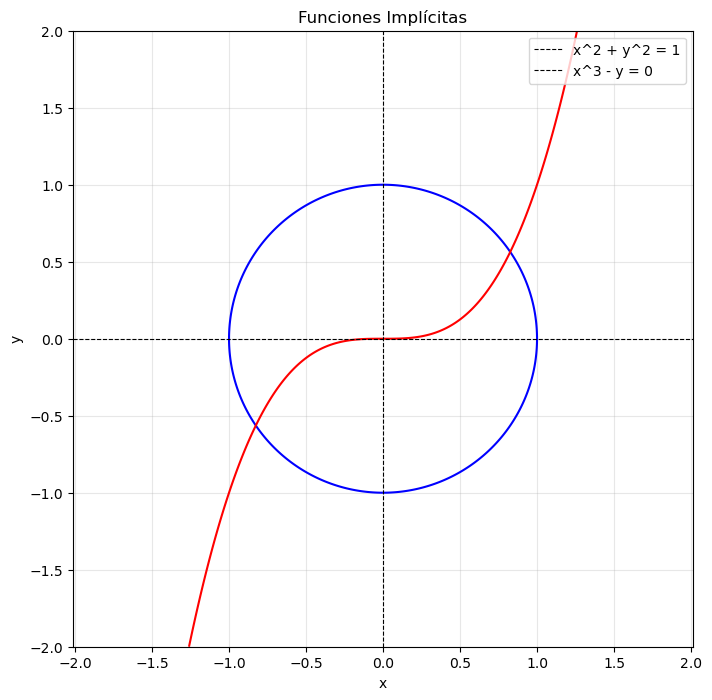

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un grid de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Definir las funciones implícitas
F1 = X**2 + Y**2 - 1  # Circunferencia
F2 = X**3 - Y         # Cúbica

# Crear el plot
plt.figure(figsize=(8, 8))
plt.contour(X, Y, F1, levels=[0], colors='blue', label='x^2 + y^2 = 1')  # Circunferencia
plt.contour(X, Y, F2, levels=[0], colors='red', label='x^3 - y = 0')     # Cúbica

# Configurar el gráfico
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(['x^2 + y^2 = 1', 'x^3 - y = 0'])
plt.title('Funciones Implícitas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()


0.044005637847617796
0.10840680297815314
0.1580034662991
0.19362405929858525


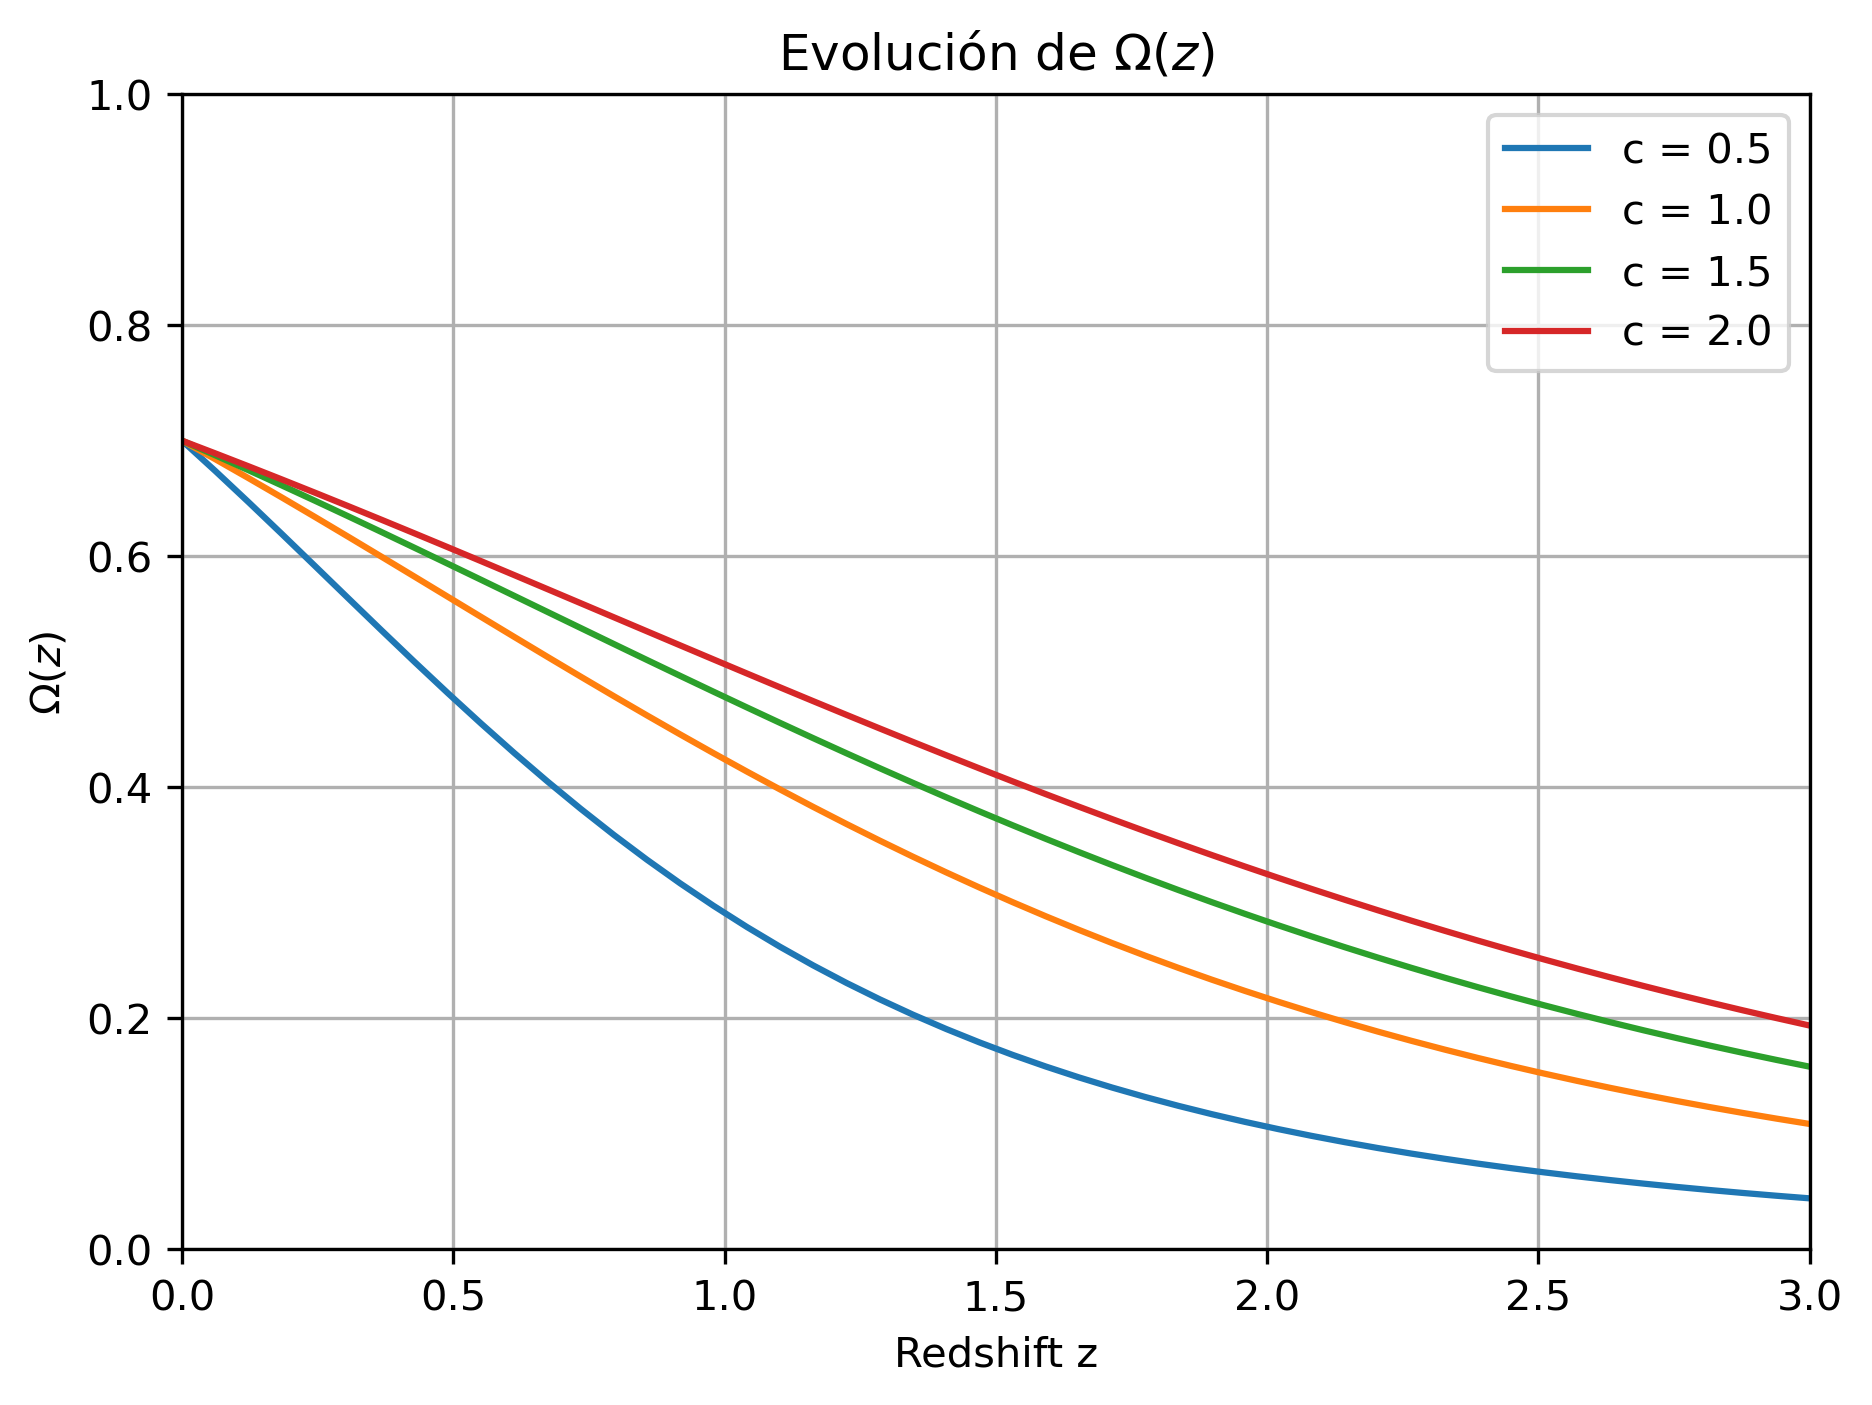

In [11]:
# Gráfica de \Omega(z)
xini = np.log(1./(1+3))
xval = np.linspace(0,xini)

plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    print(T.Ode(xini))
    plt.plot(zl, [T.Ode(x) for x in xval], label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 3)
plt.ylim(0, 1)
plt.legend()
plt.title(r"Evolución de $\Omega(z)$")
plt.grid()
plt.show()